# 2. Projekat iz predmeta Mašinsko učenje

[Credit Card Customer Segmentation Data](https://www.kaggle.com/datasets/busraatasoy/credit-card-customer-segmentation-data)

Marija Cvetković 1940 \
Luka Kocić 2022

Atributi:
- `customer_id` — jedinstveni identifikator korisnika
- `age` — starost korisnika
- `gender` — pol
- `dependent_count` — broj izdržavanih lica
- `education_level` — nivo obrazovanja
- `marital_status` — bračni status
- `estimated_income` — procenjena godišnja zarada
- `months_on_book` — broj meseci koliko je klijent u banci
- `total_relationship_count` — ukupan broj proizvoda koje koristi
- `months_inactive_12_mon` — broj neaktivnih meseci u poslednjih 12
- `credit_limit` — kreditni limit
- `total_trans_amount` — ukupan iznos transakcija
- `total_trans_count` — ukupan broj transakcija
- `avg_utilization_ratio` — prosečna stopa iskorišćenosti kredita

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv("customer-segmentation.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [3]:
df.drop(columns=["customer_id"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10127 non-null  int64  
 1   gender                    10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  object 
 4   marital_status            10127 non-null  object 
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [4]:
df.describe()

age  dependent_count  estimated_income  months_on_book  total_relationship_count  months_inactive_12_mon  credit_limit  total_trans_amount  total_trans_count  avg_utilization_ratio
count  10127.000000     10127.000000      10127.000000    10127.000000              10127.000000            10127.000000  10127.000000        10127.000000       10127.000000           10127.000000
mean      46.325960         2.346203      62078.206774       35.928409                  3.812580                2.341167   8631.953698         4404.086304          64.858695               0.274894
std        8.016814         1.298908      39372.861291        7.986416                  1.554408                1.010622   9088.776650         3397.129254          23.472570               0.275691
min       26.000000         0.000000      20000.000000       13.000000                  1.000000                0.000000   1438.300000          510.000000          10.000000               0.000000
25%       41.000000         1.000000      32000.000000       31.000000                  3.000000                2.000000   2555.000000         2155.500000          45.000000               0.023000
50%       46.000000         2.000000      50000.000000       36.000000                  4.000000                2.000000   4549.000000         3899.000000          67.000000               0.176000
75%       52.000000         3.000000      80000.000000       40.000000                  5.000000                3.000000  11067.500000         4741.000000          81.000000               0.503000
max       73.000000         5.000000     200000.000000       56.000000                  6.000000                6.000000  34516.000000        18484.000000         139.000000               0.999000

In [5]:
df.isnull().sum()

age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [6]:
df.duplicated().any()

np.False_

In [7]:
print("Broj jedinstvenih vrednosti po koloni:")
print(df.nunique())

print("\n--- Kategoričke kolone ---")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}: {df[col].unique()}")

Broj jedinstvenih vrednosti po koloni:
age                           45
gender                         2
dependent_count                6
education_level                6
marital_status                 4
estimated_income             181
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
credit_limit                6205
total_trans_amount          5033
total_trans_count            126
avg_utilization_ratio        964
dtype: int64

--- Kategoričke kolone ---

gender: ['M' 'F']

education_level: ['High School' 'Graduate' 'Uneducated' 'Post-Graduate' 'College'
 'Doctorate']

marital_status: ['Married' 'Single' 'Unknown' 'Divorced']


## Enkodiranje podataka

Postoje 3 kategoričke kolone: gender, education_level i marital_status. One će biti enkodirane na sledeći način:
- Gender: potrebno je proizvoljno enkodirati pol binarno, u našem slučaju je iskorišćen LabelEncoder (do istog rezultata bi se došlo i korišćenjem nekog drugog enkodera)
- Education level: kategorije su uporedive, pa ćemo koristiti ordinal encoder
- Martial status: korišćen je one-hot encoding, jer svaka kategorija ima podjednaku težinu

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

X = df.copy()

gender_col = ['gender']
education_col = ['education_level']
marital_col = ['marital_status']

num_cols = X.drop(columns=gender_col + education_col + marital_col).columns.tolist()
X_num = X[num_cols].to_numpy(dtype=float)

education_encoder = OrdinalEncoder(categories=[[
    "Uneducated",
    "High School",
    "College",
    "Graduate",
    "Post-Graduate",
    "Doctorate"
]])
marital_encoder = OneHotEncoder(sparse_output=False)

X_gender = df['gender'].map({'M': 0, 'F': 1}).values.reshape(-1, 1)
X_education = education_encoder.fit_transform(X[education_col])
X_marital = marital_encoder.fit_transform(X[marital_col])

marital_feature_names = marital_encoder.get_feature_names_out(marital_col).tolist()

all_columns = (
    num_cols
    + gender_col
    + education_col
    + marital_feature_names
)

X_encoded = np.hstack([X_num, X_gender, X_education, X_marital])

df = pd.DataFrame(X_encoded, columns=all_columns)

encoded_cols = (
    gender_col
    + education_col
    +marital_feature_names
)

df[encoded_cols].head()

gender  education_level  marital_status_Divorced  marital_status_Married  marital_status_Single  marital_status_Unknown
0     0.0              1.0                      0.0                     1.0                    0.0                     0.0
1     1.0              3.0                      0.0                     0.0                    1.0                     0.0
2     0.0              3.0                      0.0                     1.0                    0.0                     0.0
3     1.0              1.0                      0.0                     0.0                    0.0                     1.0
4     0.0              0.0                      0.0                     1.0                    0.0                     0.0

## Analiza numeričkih podataka

Pregledom raspodele vrednosti numeričkih podataka (histogrami) može se videti da su podaci logični i da verno oslikavaju realno ponašanje klijenata u bankarskom sektoru:

- `age` (starost korisnika): Približno normalna raspodela. Ovo je očekivano jer najveći deo klijenata banke čine radno sposobni ljudi srednjih godina, dok je manje jako mladih ili jako starih klijenata.
- `dependent_count` (broj izdržavanih lica): Relativno ravnomerna raspodela sa najviše korisnika koji imaju 2 ili 3 izdržavana lica, što odgovara prosečnoj veličini porodice.
- `estimated_income` (procenjena godišnja zarada): Izrazito desno iskošena raspodela, većina populacije ima prosečna ili niža primanja, dok samo mali procenat klijenata ima izuzetno visoke zarade.
- `months_on_book` (broj meseci koliko je klijent u banci): Približno normalna raspodela, sa izraženim pikom oko 36 meseci (3 godine), što ukazuje na stabilnu bazu klijenata i prosečno vreme zadržavanja.
- `total_relationship_count` (ukupan broj proizvoda koje koristi): Raspodela je relativno ravnomerna, što pokazuje da klijenti koriste različit spektar bankarskih usluga.
- `months_inactive_12_mon` (broj neaktivnih meseci u poslednjih 12): Blago desno iskošena raspodela. Većina korisnika je neaktivna 1 do 3 meseca, što je normalno za povremeno korišćenje kartica, dok su duži periodi neaktivnosti ređi.
- `credit_limit` (kreditni limit): Izrazito desno iskošena raspodela. Banke većini klijenata odobravaju standardne, niže limite, dok se visoki limiti (preko 30000) odobravaju samo malom broju klijenata sa visokim primanjima i dobrim kreditnim rejtingom.
- `total_trans_amount` (ukupan iznos transakcija): Izrazito desno iskošena raspodela. Većina klijenata troši prosečne iznose, dok manji broj klijenata pravi transakcije velikih vrednosti.
- `total_trans_count` (ukupan broj transakcija): Približno normalna raspodela. Oslikava postojanje različitih grupa korisnika (onih koji karticu koriste svakodnevno i onih koji je koriste povremeno).
- `avg_utilization_ratio` (prosečna stopa iskorišćenosti kredita): Desno iskošena raspodela. Veliki broj korisnika ima stopu iskorišćenosti 0 jer mnogi klijenti redovno izmiruju svoje obaveze u celosti ili uopšte ne ulaze u dozvoljeni minus.

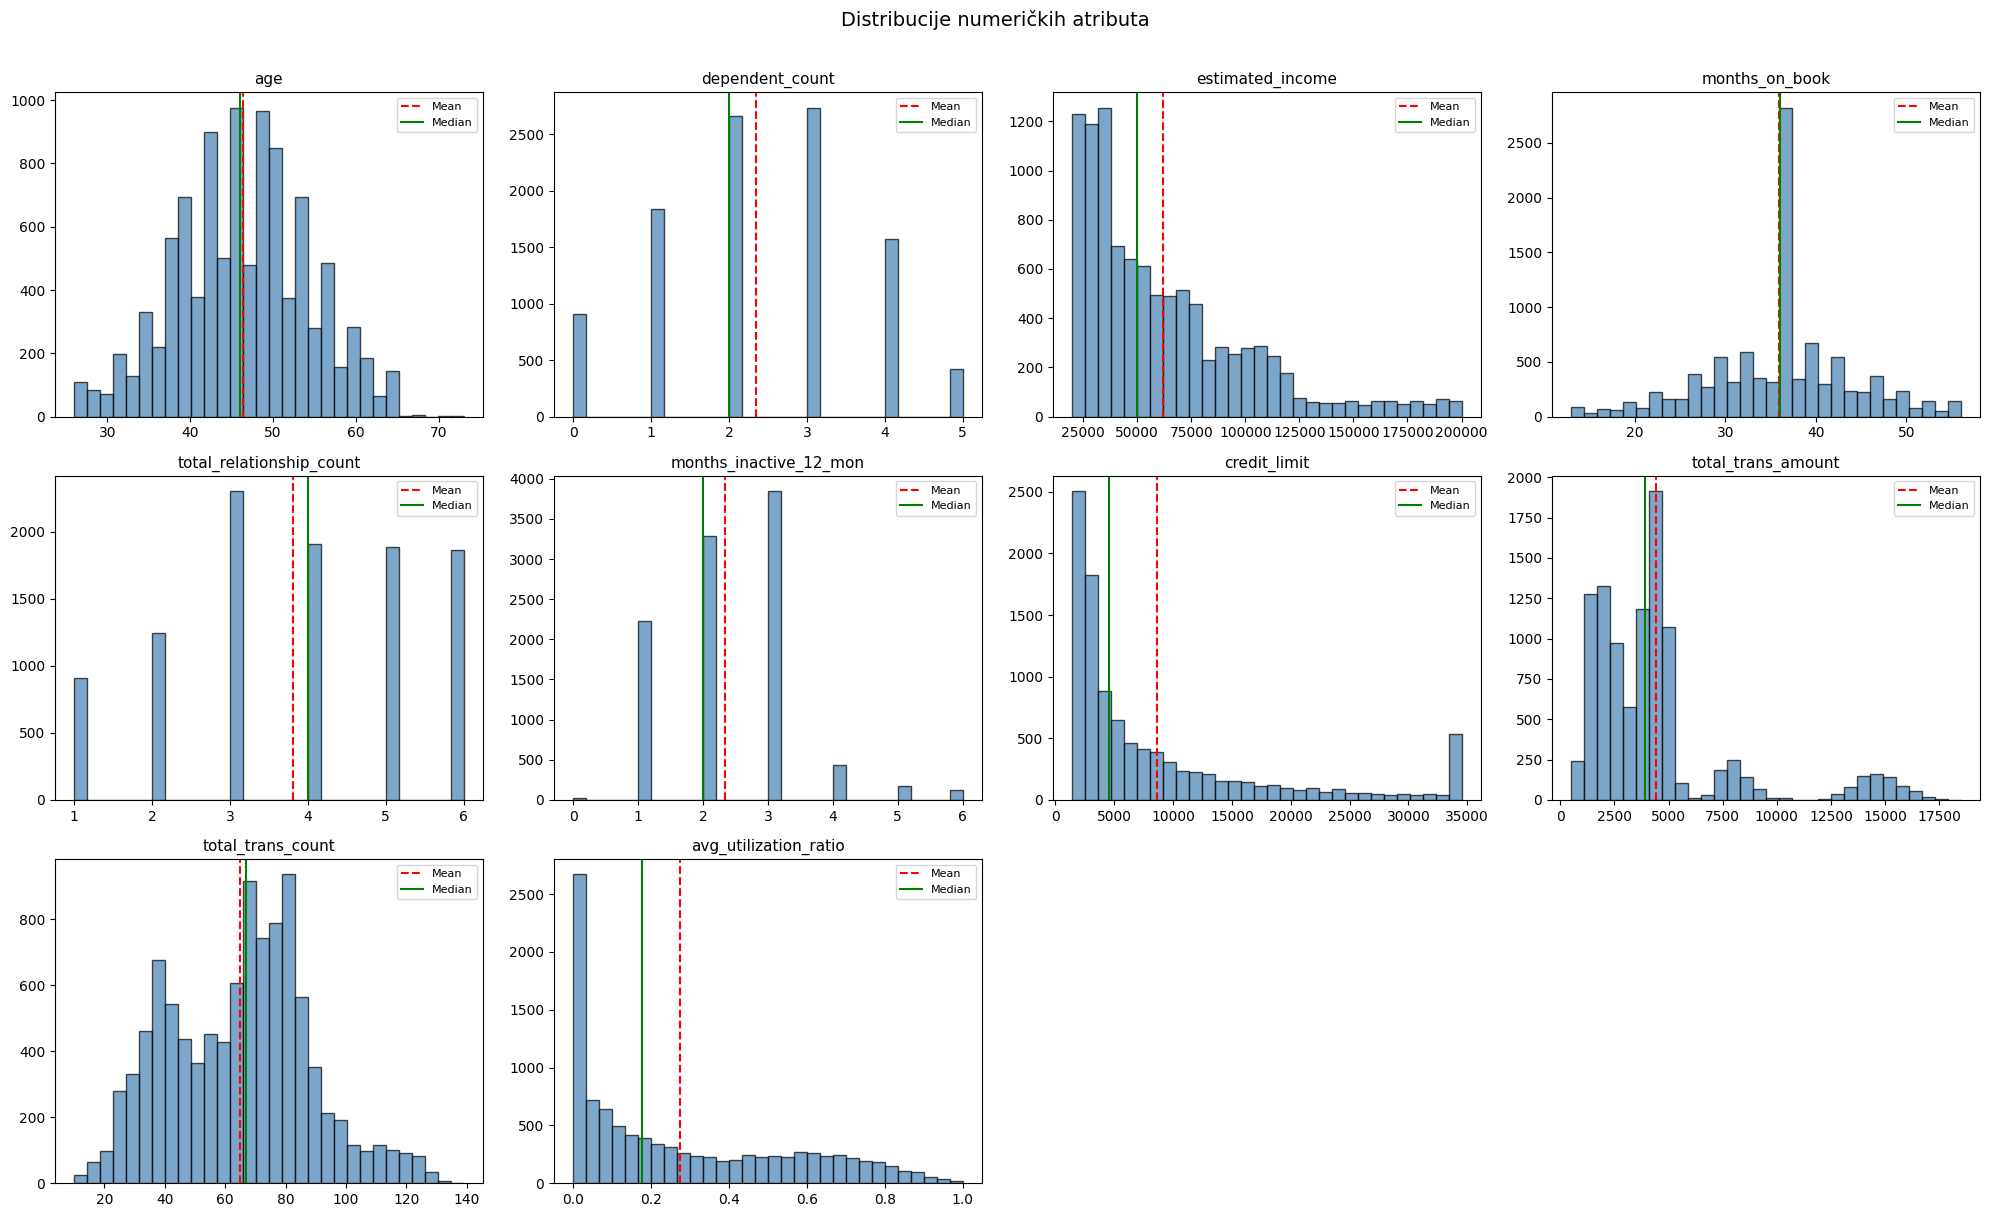

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(col, fontsize=11)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Median')
    axes[i].legend(fontsize=8)

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribucije numeričkih atributa", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

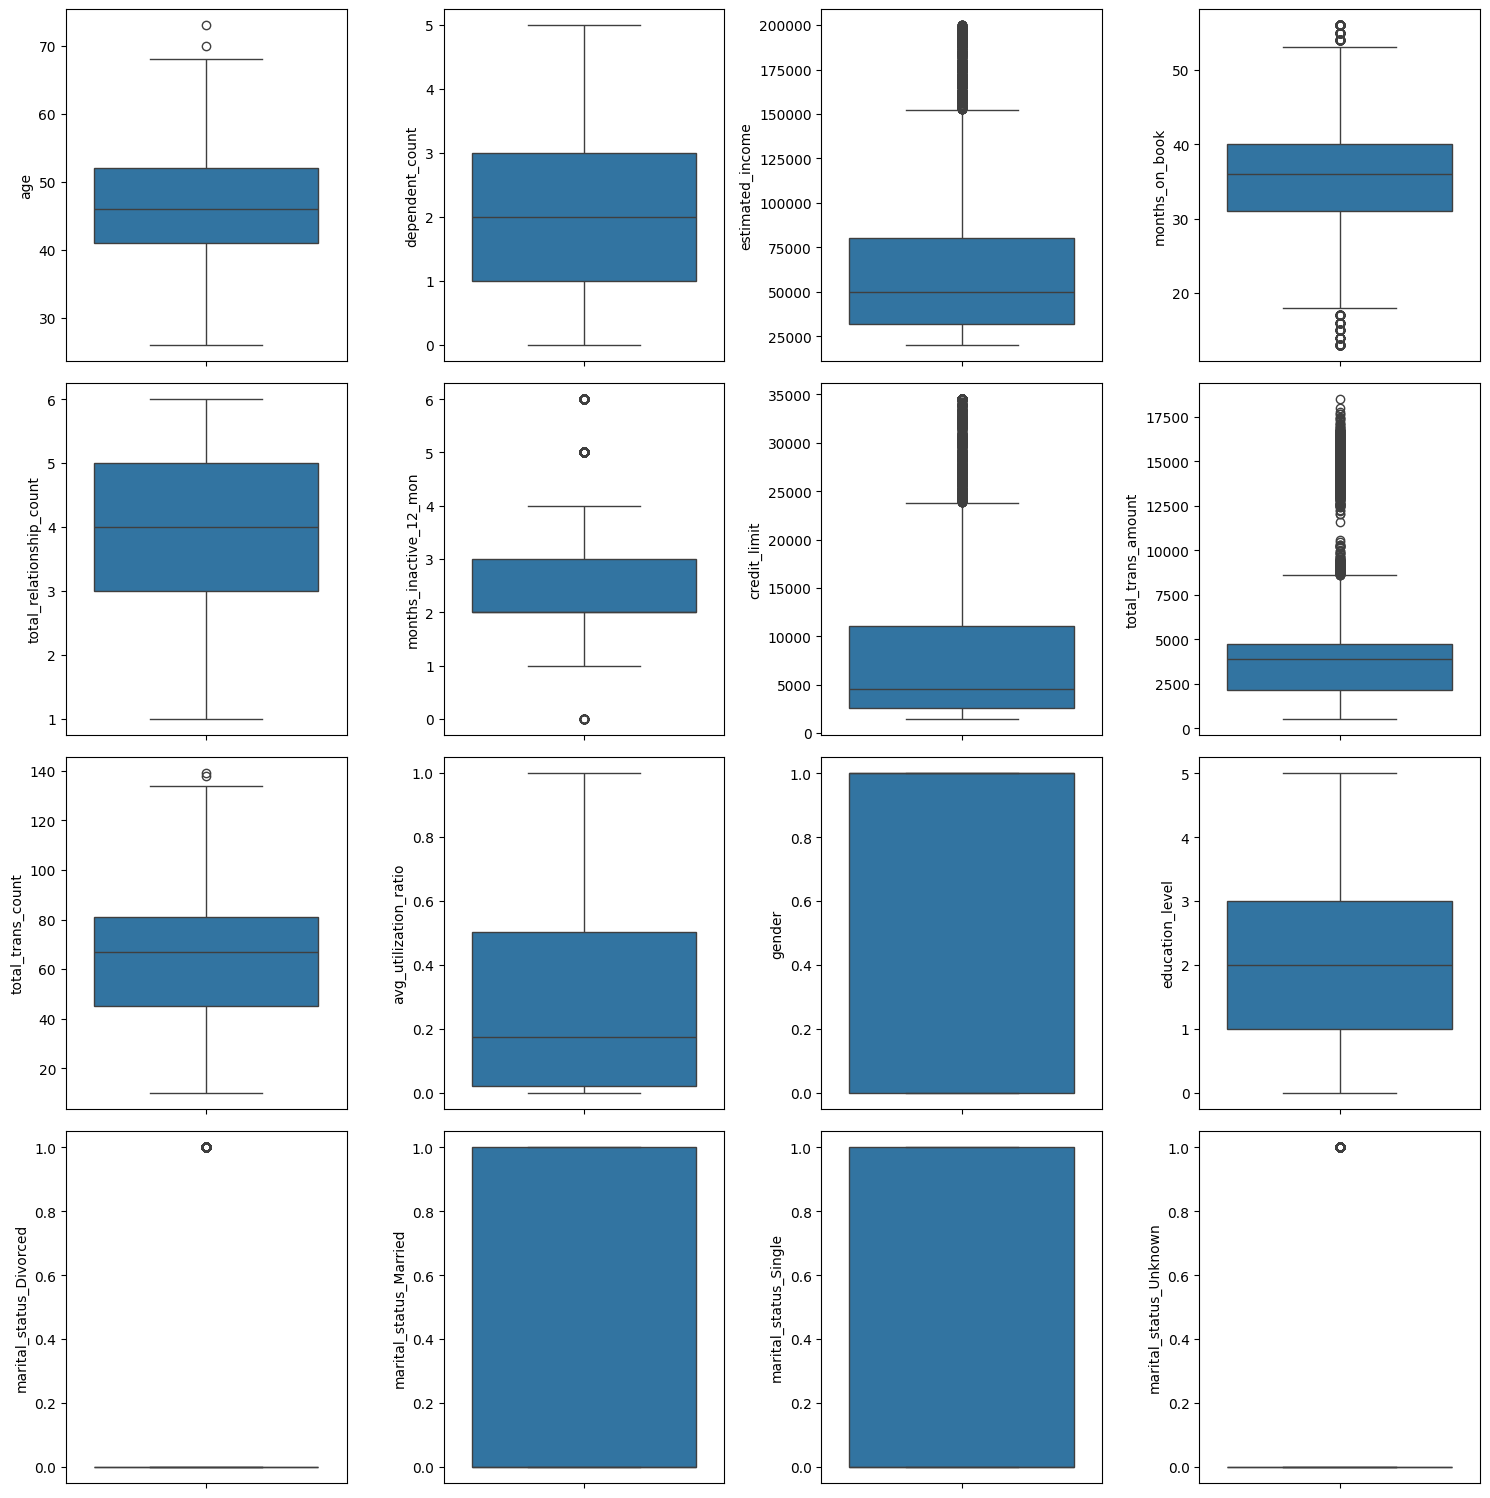

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,30))
for i in range(len(df.columns)):
    fig.add_subplot(8,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [11]:
iqr_mask = pd.Series(False, index=df.index)
zscore_mask = pd.Series(False, index=df.index)

outlier_info = {}
for column in num_cols:
    # IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    donja = Q1 - 1.5 * IQR
    gornja = Q3 + 1.5 * IQR

    iqr_mask |= (df[column] < donja) | (df[column] > gornja)
    n_outliers = ((df[column] < donja) | (df[column] > gornja)).sum()
    outlier_info[column] = {'count': n_outliers, 'pct': n_outliers / len(df) * 100,
                             'lower': donja, 'upper': gornja}

    # Z-score
    std = df[column].std()
    if std != 0:
        z = (df[column] - df[column].mean()) / std
        zscore_mask |= (z > 3) | (z < -3)

print(f"Broj redova sa bar jednim IQR outlierom: {iqr_mask.sum()}")
print(f"Broj redova sa bar jednim Z-score outlierom: {zscore_mask.sum()}")

print("\nOutlier-i po kolonama (IQR metoda):")
print(f"{'Kolona':<30} {'Broj':>6} {'%':>8}")
print("-" * 46)
for col, info in outlier_info.items():
    if info['count'] > 0:
        print(f"{col:<30} {info['count']:>6} {info['pct']:>7.1f}%")

Broj redova sa bar jednim IQR outlierom: 2530
Broj redova sa bar jednim Z-score outlierom: 699

Outlier-i po kolonama (IQR metoda):
Kolona                           Broj        %
----------------------------------------------
age                                 2     0.0%
estimated_income                  469     4.6%
months_on_book                    386     3.8%
months_inactive_12_mon            331     3.3%
credit_limit                      984     9.7%
total_trans_amount                896     8.8%
total_trans_count                   2     0.0%


Nećemo sklanjati outliere jer su svi podaci smisleni, tj najverovatnije će doći do formiranja klastera tih korisnika.

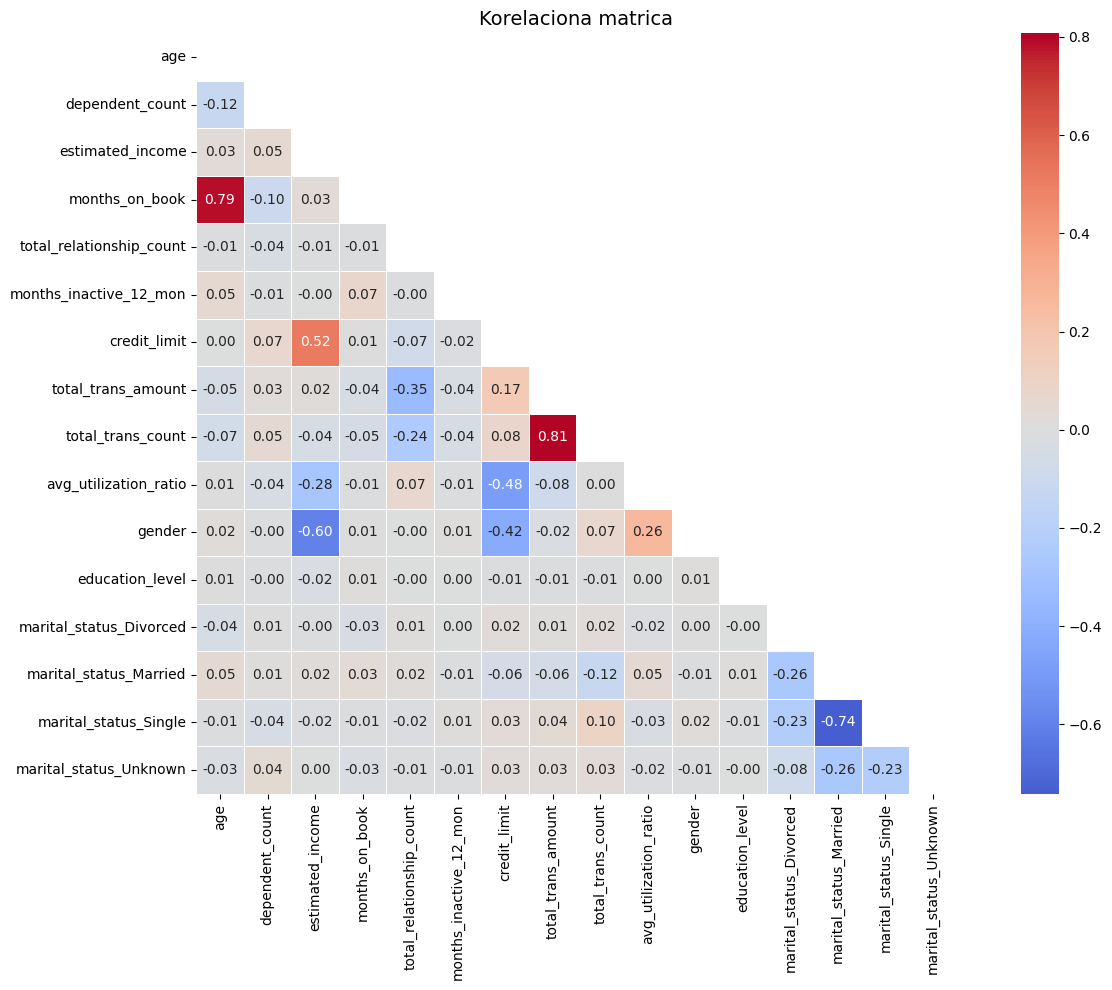

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, square=True)
plt.title("Korelaciona matrica", fontsize=14)
plt.tight_layout()
plt.show()

Na osnovu korelacione matrice možemo uočiti nekoliko značajnih veza između atributa koje su logične i očekivane:

1. **`total_trans_count` i `total_trans_amount` (0.81)**
   - Klijenti koji češće koriste karticu (veći broj transakcija) logično prave i veći ukupan promet (veći iznos transakcija).
2. **`months_on_book` i `age` (0.79)**
   - Stariji klijenti su duže vreme prisutni u banci, pa je samim tim i broj meseci od kada su klijenti banke veći.
3. **`gender` i `estimated_income` (0.60)**
   - Postoji značajna korelacija između pola i procenjene godišnje zarade. S obzirom na to kako je pol enkodiran, ovo ukazuje na razliku u prosečnim primanjima između muških i ženskih klijenata u ovom skupu podataka.
4. **`credit_limit` i `estimated_income` (0.52)**
   - Banke odobravaju veće kreditne limite klijentima koji imaju veća procenjena primanja, jer oni predstavljaju manji rizik za banku.
5. **`avg_utilization_ratio` i `credit_limit` (-0.48)**
   - Klijenti sa jako visokim kreditnim limitima retko koriste ceo iznos svog limita, pa je njihova prosečna stopa iskorišćenosti niska. Sa druge strane, klijenti sa malim limitima češće iskoriste veći procenat svog dozvoljenog minusa.

## Redukcija dimenzionalnosti

### Skaliranje

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.describe().round(2)

age  dependent_count  estimated_income  months_on_book  total_relationship_count  months_inactive_12_mon  credit_limit  total_trans_amount  total_trans_count  avg_utilization_ratio    gender  education_level  marital_status_Divorced  marital_status_Married  marital_status_Single  marital_status_Unknown
count  10127.00         10127.00          10127.00        10127.00                  10127.00                10127.00      10127.00            10127.00           10127.00               10127.00  10127.00         10127.00                 10127.00                10127.00               10127.00                10127.00
mean       0.43             0.47              0.23            0.53                      0.56                    0.39          0.22                0.22               0.43                   0.28      0.53             0.41                     0.07                    0.46                   0.39                    0.07
std        0.17             0.26              0.22            0.19                      0.31                    0.17          0.27                0.19               0.18                   0.28      0.50             0.28                     0.26                    0.50                   0.49                    0.26
min        0.00             0.00              0.00            0.00                      0.00                    0.00          0.00                0.00               0.00                   0.00      0.00             0.00                     0.00                    0.00                   0.00                    0.00
25%        0.32             0.20              0.07            0.42                      0.40                    0.33          0.03                0.09               0.27                   0.02      0.00             0.20                     0.00                    0.00                   0.00                    0.00
50%        0.43             0.40              0.17            0.53                      0.60                    0.33          0.09                0.19               0.44                   0.18      1.00             0.40                     0.00                    0.00                   0.00                    0.00
75%        0.55             0.60              0.33            0.63                      0.80                    0.50          0.29                0.24               0.55                   0.50      1.00             0.60                     0.00                    1.00                   1.00                    0.00
max        1.00             1.00              1.00            1.00                      1.00                    1.00          1.00                1.00               1.00                   1.00      1.00             1.00                     1.00                    1.00                   1.00                    1.00

### PCA

Broj komponenti za >90% varijanse: 10


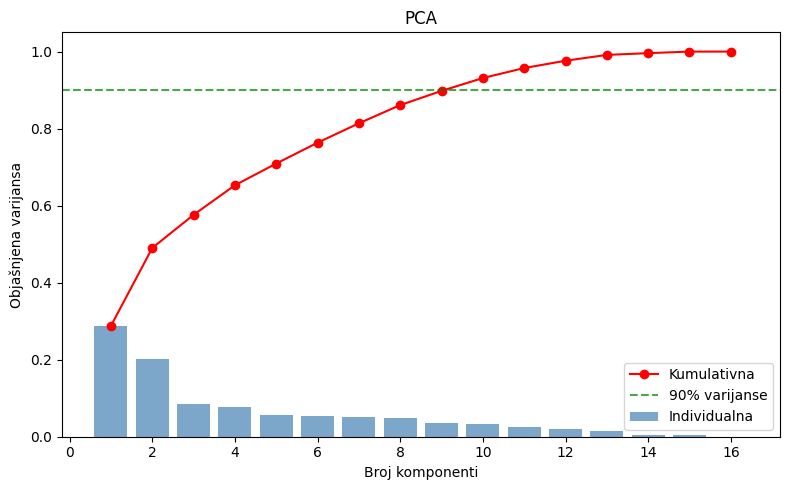

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

cumulative_var = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_, alpha=0.7, color='steelblue', label='Individualna')
ax.plot(range(1, len(cumulative_var) + 1), cumulative_var, 'ro-', label='Kumulativna')
ax.axhline(y=0.90, color='green', linestyle='--', alpha=0.7, label='90% varijanse')
ax.set_xlabel('Broj komponenti')
ax.set_ylabel('Objašnjena varijansa')
ax.set_title('PCA')
ax.legend()

n_90 = np.argmax(cumulative_var >= 0.90) + 1
print(f"Broj komponenti za >90% varijanse: {n_90}")

plt.tight_layout()
plt.show()

In [15]:
pca_10 = PCA(n_components=10)
X_pca = pca_10.fit_transform(df_scaled)

## Klasterizacija

In [16]:
import plotly.express as px

def plot_clusters_3d(X_pca, labels, title):
    fig = px.scatter_3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
                        color=labels.astype(str),
                        labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3', 'color': 'Klaster'},
                        title=title)
    fig.update_traces(marker_size=3)
    fig.show()

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

results = pd.DataFrame(columns=['Model', 'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])
results.set_index('Model', inplace=True)

def append_results(model_name, X, clusters):
    silhouette = silhouette_score(X, clusters)
    calinski = calinski_harabasz_score(X, clusters)
    davies = davies_bouldin_score(X, clusters)
    results.loc[model_name, 'Silhouette Score'] = silhouette
    results.loc[model_name, 'Calinski-Harabasz'] = calinski
    results.loc[model_name, 'Davies-Bouldin'] = davies

    display(results.loc[[model_name]])

In [18]:
import matplotlib.pyplot as plt

def plot_feature_importance(df, clusters):
    centroids = df.groupby(clusters).mean()
        
    feature_importance = centroids.std(axis=0).sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    plt.bar(feature_importance.index, feature_importance)
    plt.xticks(rotation=90)
    plt.title('Feature Importance based on centroids')
    plt.show()

    return feature_importance

### K-Means

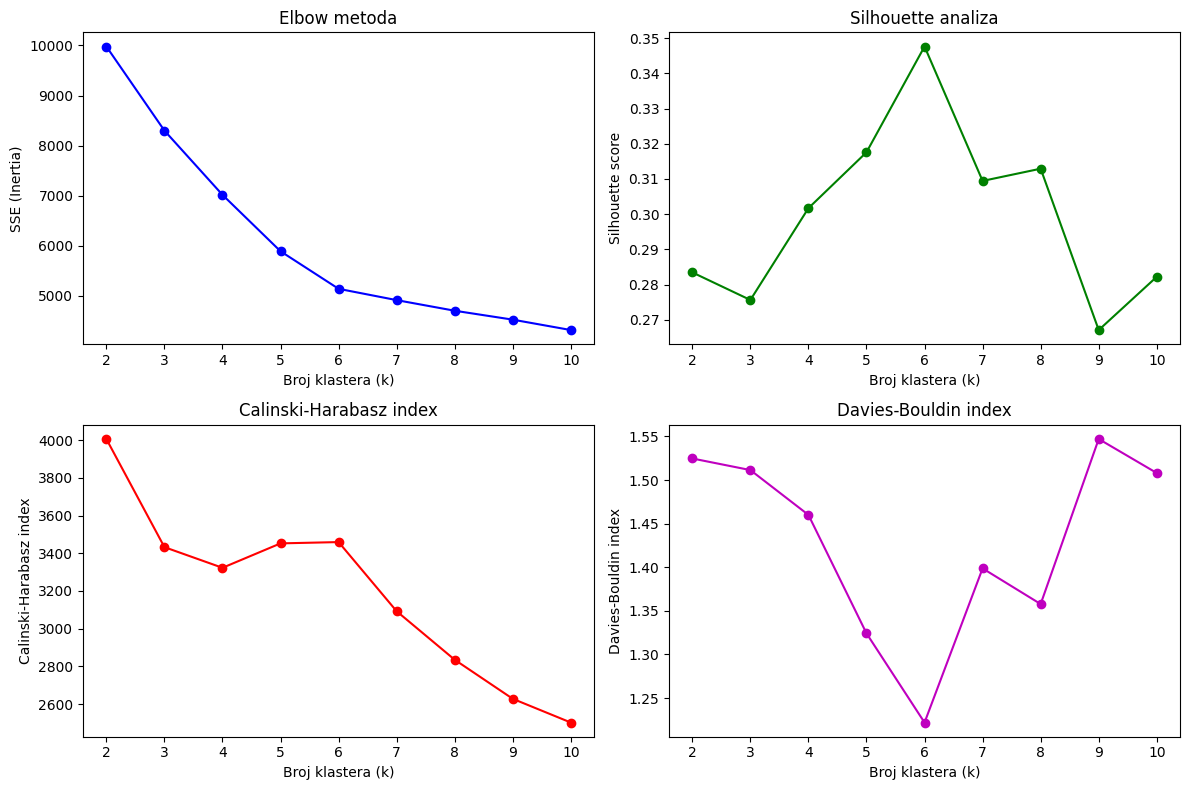

Najbolji k po elbow metodi: k = 6
Najbolji Silhouette score: k = 6
Najbolji Calinski-Harabasz: k = 2
Najbolji Davies-Bouldin: k = 6


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from kneed import KneeLocator

K_range = range(2, 11)
sse = []
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))
    calinski_scores.append(calinski_harabasz_score(X_pca, labels))
    davies_scores.append(davies_bouldin_score(X_pca, labels))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Elbow
axes[0, 0].plot(K_range, sse, 'bo-')
axes[0, 0].set_xlabel('Broj klastera (k)')
axes[0, 0].set_ylabel('SSE (Inertia)')
axes[0, 0].set_title('Elbow metoda')
axes[0, 0].set_xticks(list(K_range))

# Silhouette
axes[0, 1].plot(K_range, silhouette_scores, 'go-')
axes[0, 1].set_xlabel('Broj klastera (k)')
axes[0, 1].set_ylabel('Silhouette score')
axes[0, 1].set_title('Silhouette analiza')
axes[0, 1].set_xticks(list(K_range))

# Calinski-Harabasz
axes[1, 0].plot(K_range, calinski_scores, 'ro-')
axes[1, 0].set_xlabel('Broj klastera (k)')
axes[1, 0].set_ylabel('Calinski-Harabasz index')
axes[1, 0].set_title('Calinski-Harabasz index')
axes[1, 0].set_xticks(list(K_range))

# Davies-Bouldin
axes[1, 1].plot(K_range, davies_scores, 'mo-')
axes[1, 1].set_xlabel('Broj klastera (k)')
axes[1, 1].set_ylabel('Davies-Bouldin index')
axes[1, 1].set_title('Davies-Bouldin index')
axes[1, 1].set_xticks(list(K_range))

plt.tight_layout()
plt.show()

kl = KneeLocator(list(K_range), sse, curve="convex", direction="decreasing")

print(f"Najbolji k po elbow metodi: k = {kl.elbow}")
print(f"Najbolji Silhouette score: k = {K_range[np.argmax(silhouette_scores)]}")
print(f"Najbolji Calinski-Harabasz: k = {K_range[np.argmax(calinski_scores)]}")
print(f"Najbolji Davies-Bouldin: k = {K_range[np.argmin(davies_scores)]}")

Ako izuzmemo klasterisanje na 2 klastera koje predlaže Calinski-Harabasz metoda, optimalna vrednost za k je 6. Tako da biramo 6

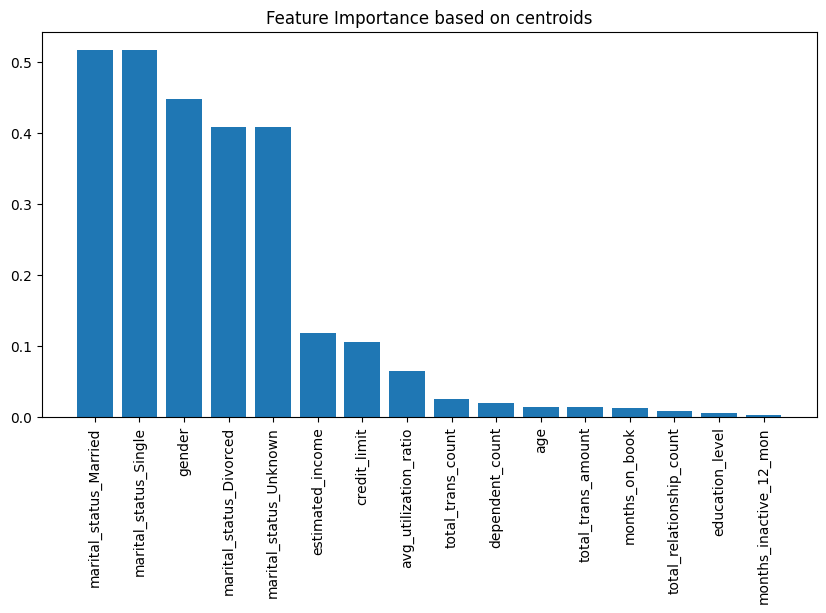

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                         
KMeans (k=6)         0.347624       3459.456564       1.221936

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)
plot_clusters_3d(X_pca, labels, 'KMeans (k=6) na PCA_10 3D')
featire_importance = plot_feature_importance(df_scaled, labels)
append_results('KMeans (k=6)', X_pca, labels)

## Agglomerative Clustering

### Analiza dendograma

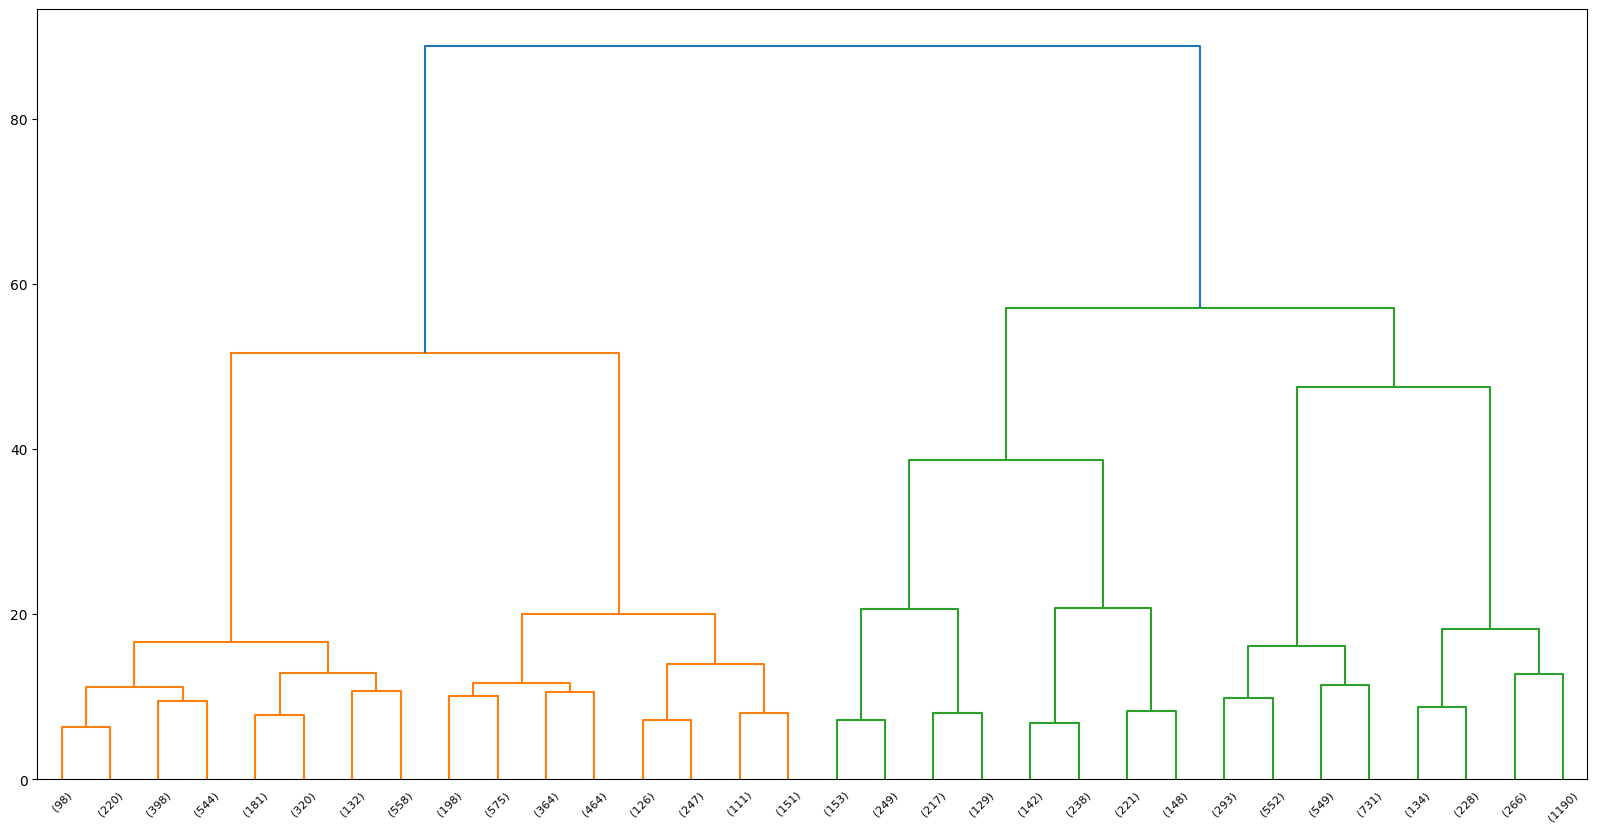

In [21]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_scaled, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(Z,truncate_mode='level', p=4)
plt.show()

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
Hierarchical (dendrogram cut height = 75)         0.262194       3632.799973       1.607823

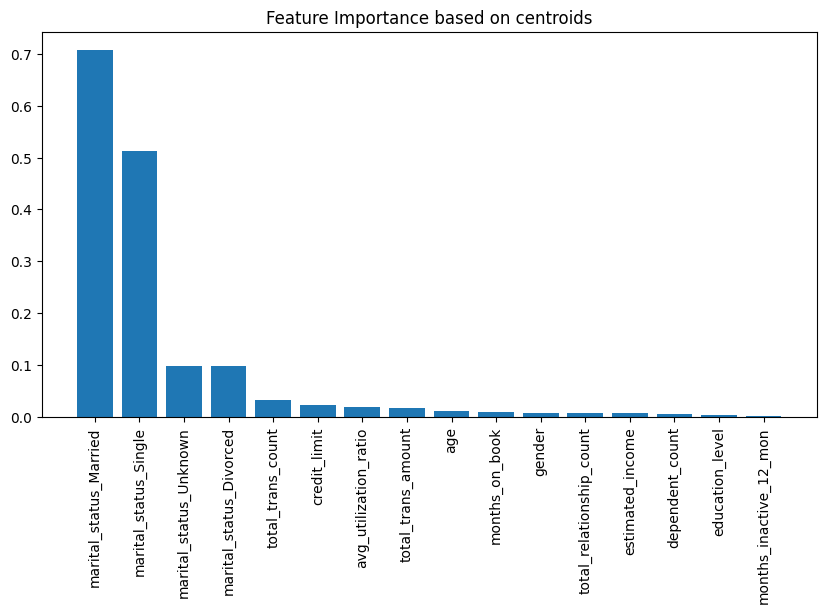

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
Hierarchical (dendrogram cut height = 55)         0.315385       3012.218791       1.682093

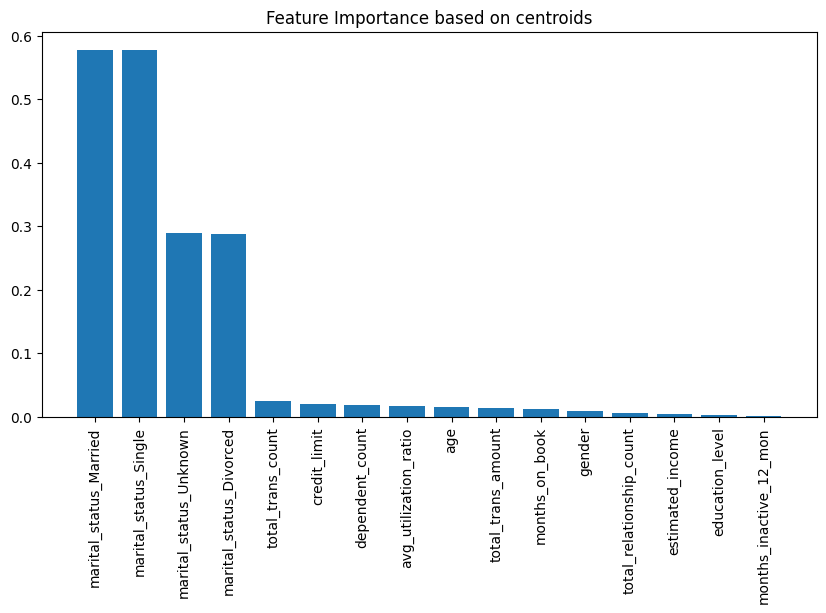

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
Hierarchical (dendrogram cut height = 50)         0.271052       2899.655868       1.544479

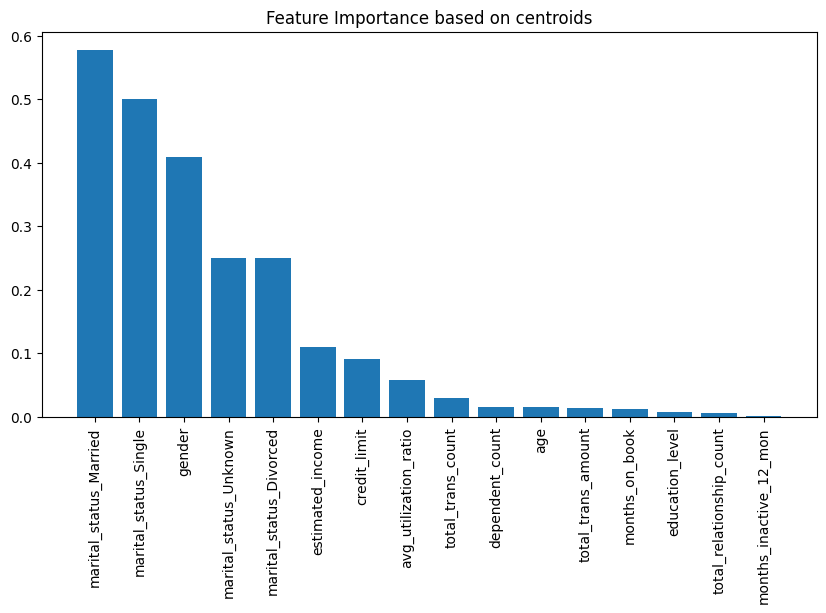

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
Hierarchical (dendrogram cut height = 40)         0.282274       2942.068905        1.41253

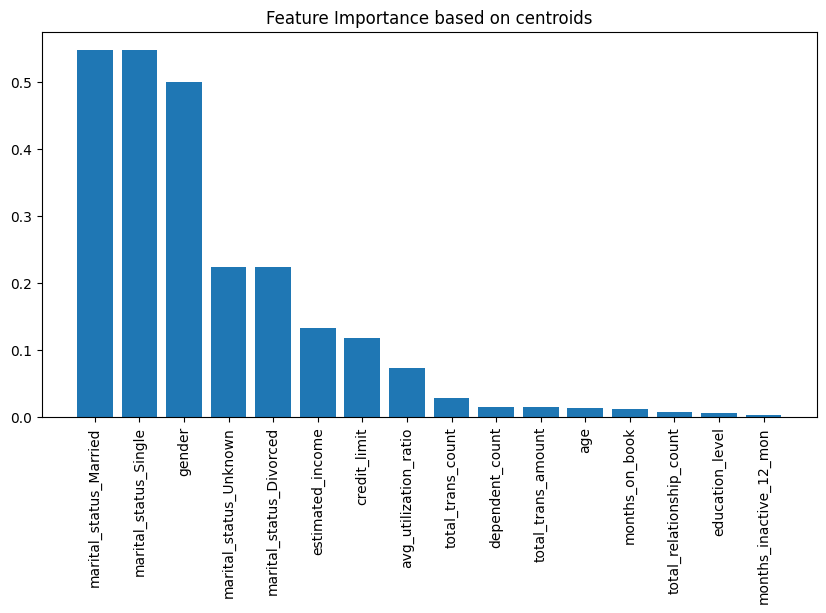

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
Hierarchical (dendrogram cut height = 30)         0.309932       2885.563602       1.339052

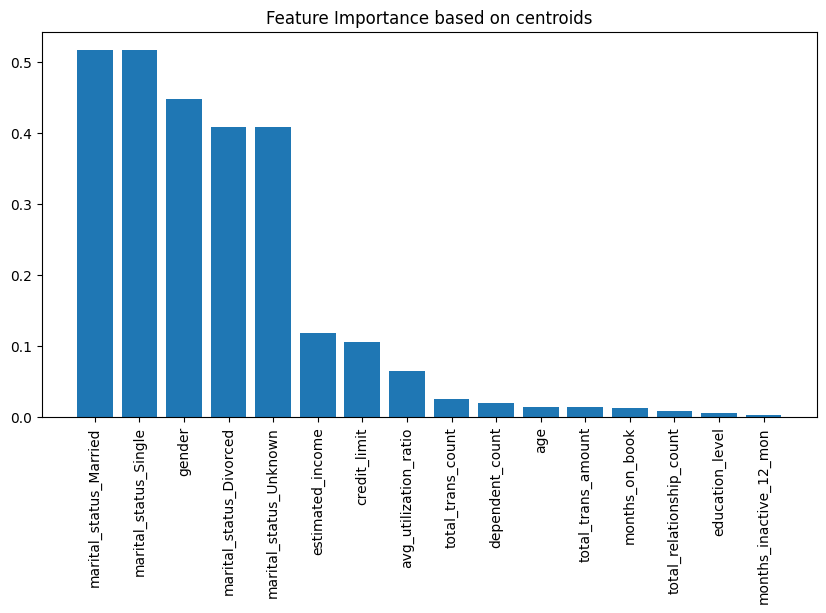

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
Hierarchical (dendrogram cut height = 20)         0.283937       2151.375838       1.540898

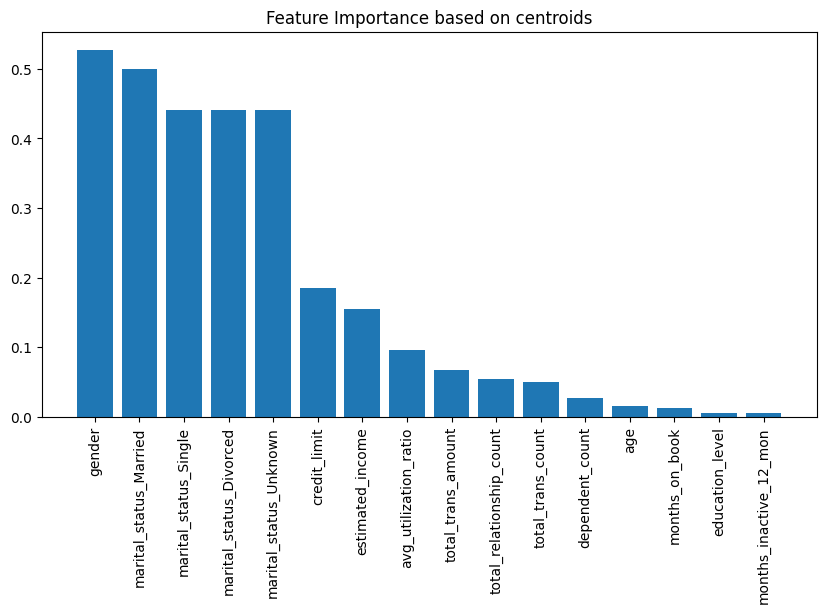

In [22]:
from scipy.cluster.hierarchy import fcluster


for cut_height in[75,55, 50, 40, 30, 20]:
    clusters = fcluster(Z, cut_height, criterion='distance')
    plot_clusters_3d(X_pca, clusters, f'Cut height = {cut_height}')
    
    append_results(
        f'Hierarchical (dendrogram cut height = {cut_height})',
        df_scaled,
        clusters
    )
    
    fi = plot_feature_importance(df_scaled, clusters - 1)

## DBSCAN

Eps (ε) predstavlja maksimalnu udaljenost između dve tačke da bi se one smatrale susedima. Drugim rečima, eps definiše radijus unutar kog se traže bliske tačke prilikom formiranja klastera. Veća vrednost eps dovodi do formiranja većih i manje strogo definisanih klastera, dok manja vrednost povećava verovatnoću pojave šuma (noise).

Min_samples predstavlja minimalan broj tačaka koje moraju postojati unutar eps radijusa da bi se neka tačka smatrala jezgrenom (core point) i pokrenula formiranje klastera. Veća vrednost min_samples čini kriterijum strožim i smanjuje broj klastera, dok manja vrednost omogućava lakše formiranje klastera.

min_samples = 2×broj dimenzija zato uzimamo vrednosti oko 20. Imamo 16 kolona i 12 000 redova, ali sa PCA imamo 10.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def best_dbscan():
    results = []

    for ms in [ 16, 18, 20,22,24]:
        nn = NearestNeighbors(n_neighbors=ms).fit(X_pca)
        dists, _ = nn.kneighbors(X_pca)
        eps = np.percentile(dists[:, -1], 90)

        labels = DBSCAN(eps=eps, min_samples=ms).fit_predict(X_pca)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters < 2:
            continue

        mask = labels != -1
        if len(set(labels[mask])) < 2:
            continue

        sil = silhouette_score(X_pca[mask], labels[mask])
        ch = calinski_harabasz_score(X_pca[mask], labels[mask])
        db = davies_bouldin_score(X_pca[mask], labels[mask])

        results.append((ms, eps, n_clusters, sil, ch, db, labels))

    df = pd.DataFrame(
        [(r[0], r[1], r[2], r[3], r[4], r[5]) for r in results],
        columns=["min_samples", "eps", "n_clusters", "Silhouette", "Calinski_Harabasz", "Davies_Bouldin"]
    )

    best = {
        "Silhouette": df.loc[df["Silhouette"].idxmax(), "min_samples"],
        "Calinski_Harabasz": df.loc[df["Calinski_Harabasz"].idxmax(), "min_samples"],
        "Davies_Bouldin": df.loc[df["Davies_Bouldin"].idxmin(), "min_samples"],
    }

    print("\nNajbolji parametri po metrikama:")
    for metric, ms_val in best.items():
        row = df[df["min_samples"] == ms_val].iloc[0]
        print(f"{metric}: min_samples={int(ms_val)}, eps={row['eps']:.3f}, n_clusters={int(row['n_clusters'])}")
 
    return df, best

best_dbscan()


Najbolji parametri po metrikama:
Silhouette: min_samples=16, eps=0.505, n_clusters=8
Calinski_Harabasz: min_samples=24, eps=0.545, n_clusters=8
Davies_Bouldin: min_samples=16, eps=0.505, n_clusters=8


(   min_samples       eps  n_clusters  Silhouette  Calinski_Harabasz  Davies_Bouldin
 0           16  0.505162           8    0.357692        2817.197336        1.191030
 1           18  0.515202           8    0.357544        2818.512045        1.191807
 2           20  0.525430           8    0.357179        2819.170232        1.193537
 3           22  0.535278           8    0.356999        2819.937952        1.195046
 4           24  0.545132           8    0.356814        2820.091274        1.196337,
 {'Silhouette': np.int64(16),
  'Calinski_Harabasz': np.int64(24),
  'Davies_Bouldin': np.int64(16)})

Biramo min_samples=16 i eps=0.505

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                   
DBSCAN         0.346961       2398.828728       1.652433

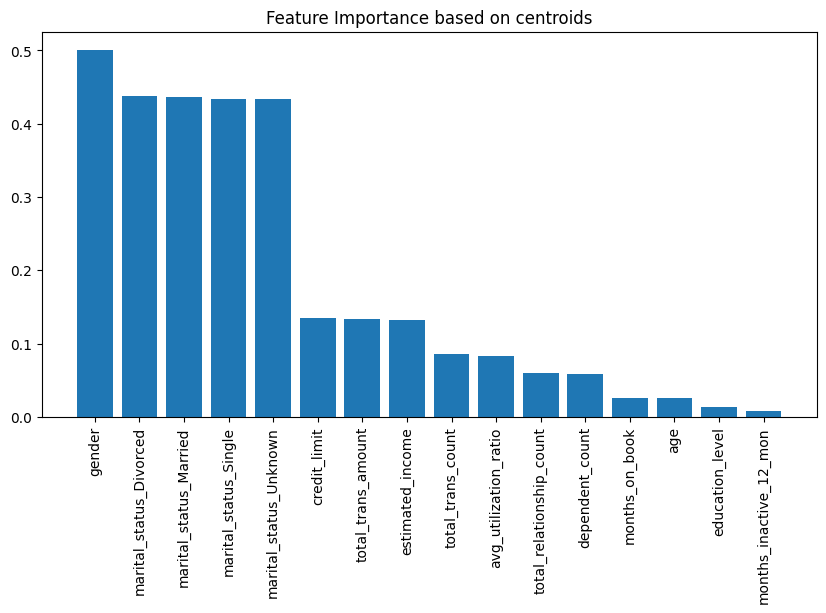

In [24]:
from sklearn.cluster import DBSCAN

labels = DBSCAN(eps=0.505, min_samples=16).fit_predict(X_pca)

plot_clusters_3d(X_pca, labels, 'DBSCAN na PCA_10 3D')
append_results('DBSCAN', X_pca, labels)
featire_importance = plot_feature_importance(df_scaled, labels)

## Mean Shift

Parametar bandwidth u algoritmu Mean Shift predstavlja širinu prozora, odnosno radijus unutar kog se procenjuje lokalna gustina podataka. Za svaku tačku u prostoru razmatraju se susedne tačke koje se nalaze unutar zadatog radijusa, a zatim se računa centar gustine na osnovu tih tačaka. 0.10 znači da se bandwidth računa na osnovu 10% najbližih rastojanja.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def best_meanshift(X_pca, quantiles=(0.10, 0.15, 0.20, 0.25, 0.30)):
    Xp = np.asarray(X_pca)
    results = []
 
    for q in quantiles:
        bw = estimate_bandwidth(Xp, quantile=q, n_samples=len(Xp), random_state=42)
 
        labels = MeanShift(bandwidth=bw, bin_seeding=True).fit_predict(Xp)
        k = len(np.unique(labels))

        if k < 2:
            continue
 
        sil = silhouette_score(Xp, labels)
        ch = calinski_harabasz_score(Xp, labels)
        db = davies_bouldin_score(Xp, labels)
 
        results.append((q, bw, k, sil, ch, db))
 
    df = pd.DataFrame(
        results,
        columns=["quantile", "bandwidth", "k",
                 "Silhouette", "Calinski_Harabasz", "Davies_Bouldin"]
    )
 
    best = {
        "Silhouette": df.loc[df["Silhouette"].idxmax(), ["bandwidth", "k"]],
        "Calinski_Harabasz": df.loc[df["Calinski_Harabasz"].idxmax(), ["bandwidth", "k"]],
        "Davies_Bouldin": df.loc[df["Davies_Bouldin"].idxmin(), ["bandwidth", "k"]],
    }
 
    print("Najbolji parametri:")
    for metric, row in best.items():
        print(f"{metric}: bandwidth={row['bandwidth']:.4f}, k={int(row['k'])}")

    return df, best

df_results_ms, best_ms = best_meanshift(X_pca)
print(df_results_ms)

Najbolji parametri:
Silhouette: bandwidth=1.2478, k=4
Calinski_Harabasz: bandwidth=1.1246, k=3
Davies_Bouldin: bandwidth=1.2478, k=4
   quantile  bandwidth  k  Silhouette  Calinski_Harabasz  Davies_Bouldin
0      0.10   0.995242  5    0.330288        2914.590819        1.215397
1      0.15   1.124611  3    0.341072        3382.658717        1.600437
2      0.20   1.247771  4    0.367520        2810.030343        1.204884


Biramo bandwidth bandwidth=1.2478 koji deli podatke na 4 klastera.

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                      
MeanShift          0.36752       2810.030343       1.204884

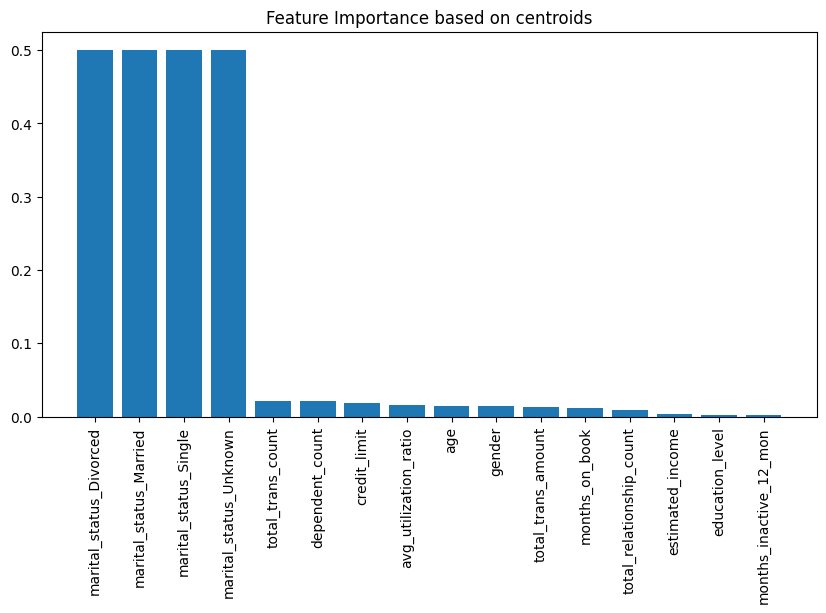

In [26]:
from sklearn.cluster import MeanShift

labels = MeanShift(bandwidth=1.2478, bin_seeding=True).fit_predict(X_pca)

plot_clusters_3d(X_pca, labels, ' MeanShift na PCA_10 3D')
append_results('MeanShift', X_pca, labels)
featire_importance = plot_feature_importance(df_scaled, labels)

### Spectral Clustering


Najbolji k po metrikama:
Silhouette: 4
Calinski-Harabasz: 2
Davies-Bouldin: 7
    k  Silhouette  Calinski_Harabasz  Davies_Bouldin
0   2    0.280711        3894.830433        1.491881
1   3    0.341072        3382.658717        1.600437
2   4    0.367520        2810.030343        1.204884
3   5    0.331685        3092.507421        1.213333
4   6    0.347624        3459.456564        1.221936
5   7    0.350733        3082.638315        1.194159
6   8    0.353801        2825.723336        1.224888
7   9    0.322021        2652.543837        1.328658
8  10    0.273819        2493.989918        1.512244
{'Silhouette': np.int64(4), 'Calinski_Harabasz': np.int64(2), 'Davies_Bouldin': np.int64(7)}


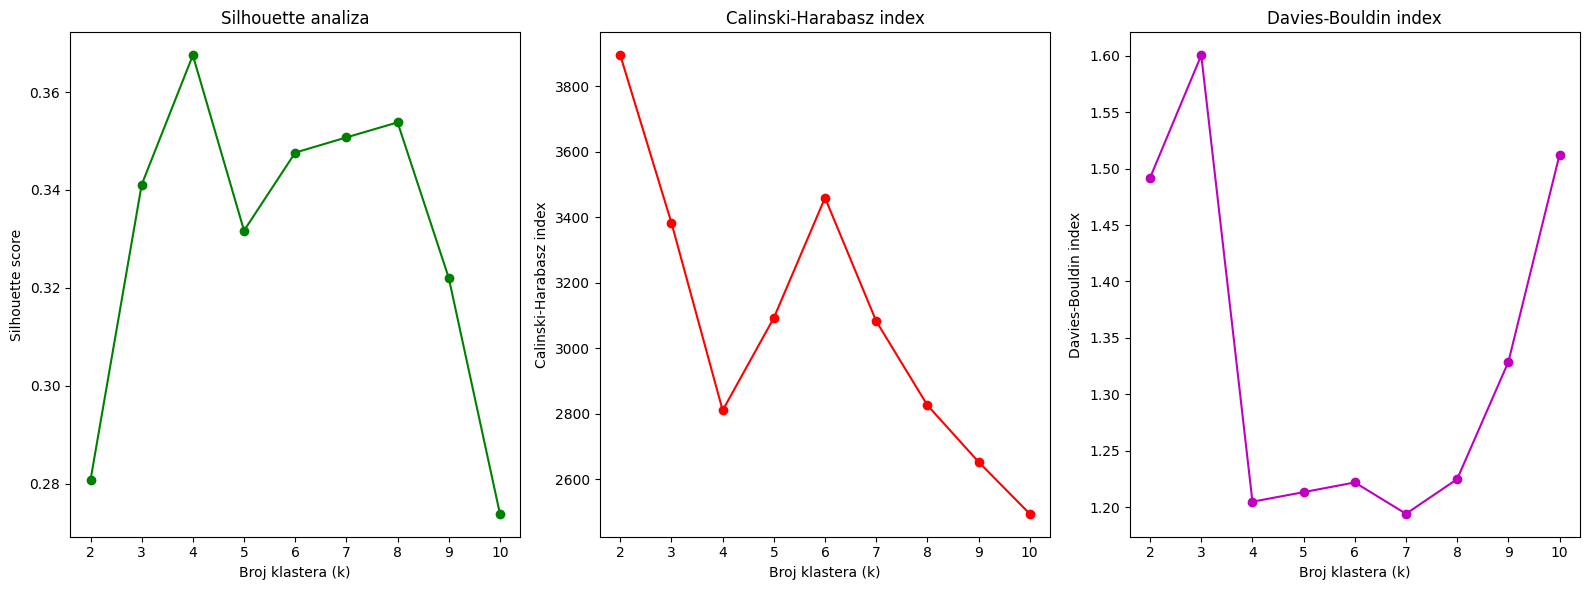

In [27]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

k_range=range(2, 11)

def best_k_spectral(X, n_neighbors=200):
    results = []

    for k in k_range:
        model = SpectralClustering(
            n_clusters=k,
            affinity="nearest_neighbors",
            n_neighbors=n_neighbors,
            random_state=42
        )

        labels = model.fit_predict(X)

        sil = silhouette_score(X, labels)
        ch = calinski_harabasz_score(X, labels)
        db = davies_bouldin_score(X, labels)

        results.append((k, sil, ch, db))

    df = pd.DataFrame(results, columns=["k", "Silhouette", "Calinski_Harabasz", "Davies_Bouldin"])

    best_sil_k = df.loc[df["Silhouette"].idxmax(), "k"]
    best_ch_k = df.loc[df["Calinski_Harabasz"].idxmax(), "k"]
    best_db_k = df.loc[df["Davies_Bouldin"].idxmin(), "k"]

    print("\nNajbolji k po metrikama:")
    print(f"Silhouette: {best_sil_k}")
    print(f"Calinski-Harabasz: {best_ch_k}")
    print(f"Davies-Bouldin: {best_db_k}")

    return df, {
        "Silhouette": best_sil_k,
        "Calinski_Harabasz": best_ch_k,
        "Davies_Bouldin": best_db_k
    }
    
df_results, best_k = best_k_spectral(X_pca)
print(df_results)
print(best_k)


fig, axes = plt.subplots(1, 3, figsize=(16, 6))


# Silhouette
axes[0].plot(k_range, df_results["Silhouette"], 'go-')
axes[0].set_xlabel('Broj klastera (k)')
axes[0].set_ylabel('Silhouette score')
axes[0].set_title('Silhouette analiza')
axes[0].set_xticks(k_range)

# Calinski-Harabasz
axes[1].plot(k_range, df_results["Calinski_Harabasz"], 'ro-')
axes[1].set_xlabel('Broj klastera (k)')
axes[1].set_ylabel('Calinski-Harabasz index')
axes[1].set_title('Calinski-Harabasz index')
axes[1].set_xticks(k_range)

# Davies-Bouldin
axes[2].plot(k_range, df_results["Davies_Bouldin"], 'mo-')
axes[2].set_xlabel('Broj klastera (k)')
axes[2].set_ylabel('Davies-Bouldin index')
axes[2].set_title('Davies-Bouldin index')
axes[2].set_xticks(k_range)

plt.tight_layout()
plt.show()

Uzimamo da je K=4

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                               
SpectralClustering          0.36752       2810.030343       1.204884

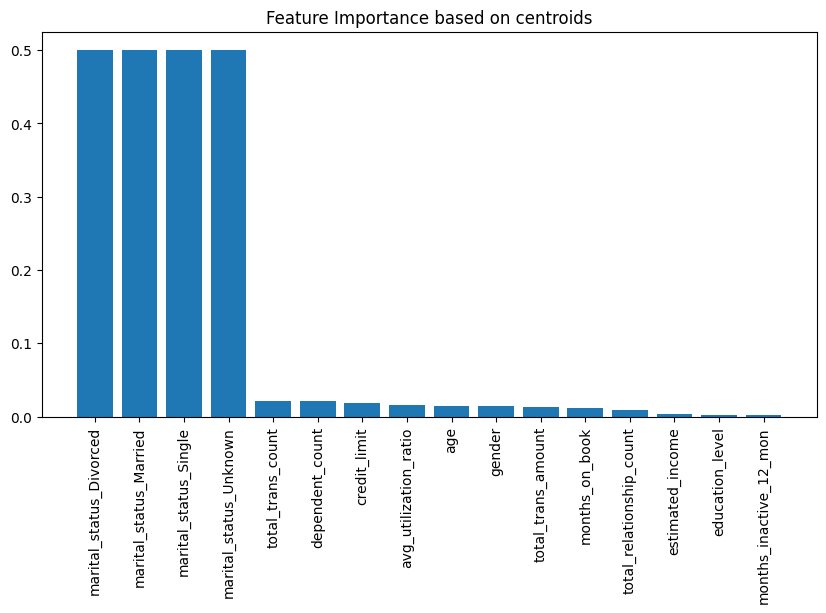

In [28]:
model = SpectralClustering(
            n_clusters=4,
            affinity="nearest_neighbors",
            n_neighbors=200,
            random_state=42
        )

labels = model.fit_predict(X_pca)

plot_clusters_3d(X_pca, labels, ' SpectralClustering na PCA_10 3D')
append_results('SpectralClustering', X_pca, labels)
featire_importance = plot_feature_importance(df_scaled, labels)

### Gaussian Mixture Model (GMM)

Silhouette: 5
Calinski_Harabasz: 5
Davies_Bouldin: 5
    k  Silhouette  Calinski_Harabasz  Davies_Bouldin            BIC            AIC
0   2    0.213830        2645.963279        1.929073   23057.827897   22111.620085
1   3    0.275611        3432.591429        1.511463 -148321.857941 -149744.781140
2   4    0.301690        3322.966740        1.460046 -261226.279038 -263125.917624
3   5    0.317575        3452.589221        1.324210 -288110.103846 -290486.457819
4   6    0.279415        2895.441884        1.580632 -289445.858431 -292298.927790
5   7    0.309794        3029.383469        1.470783 -303889.546523 -307219.331269
6   8    0.250641        2693.137348        1.846763 -307827.096115 -311633.596247
7   9    0.212863        2477.821857        1.981251 -309194.331673 -313477.547192
8  10    0.208446        2292.807427        1.950286 -309707.298105 -314467.229011
{'Silhouette': np.int64(5), 'Calinski_Harabasz': np.int64(5), 'Davies_Bouldin': np.int64(5)}


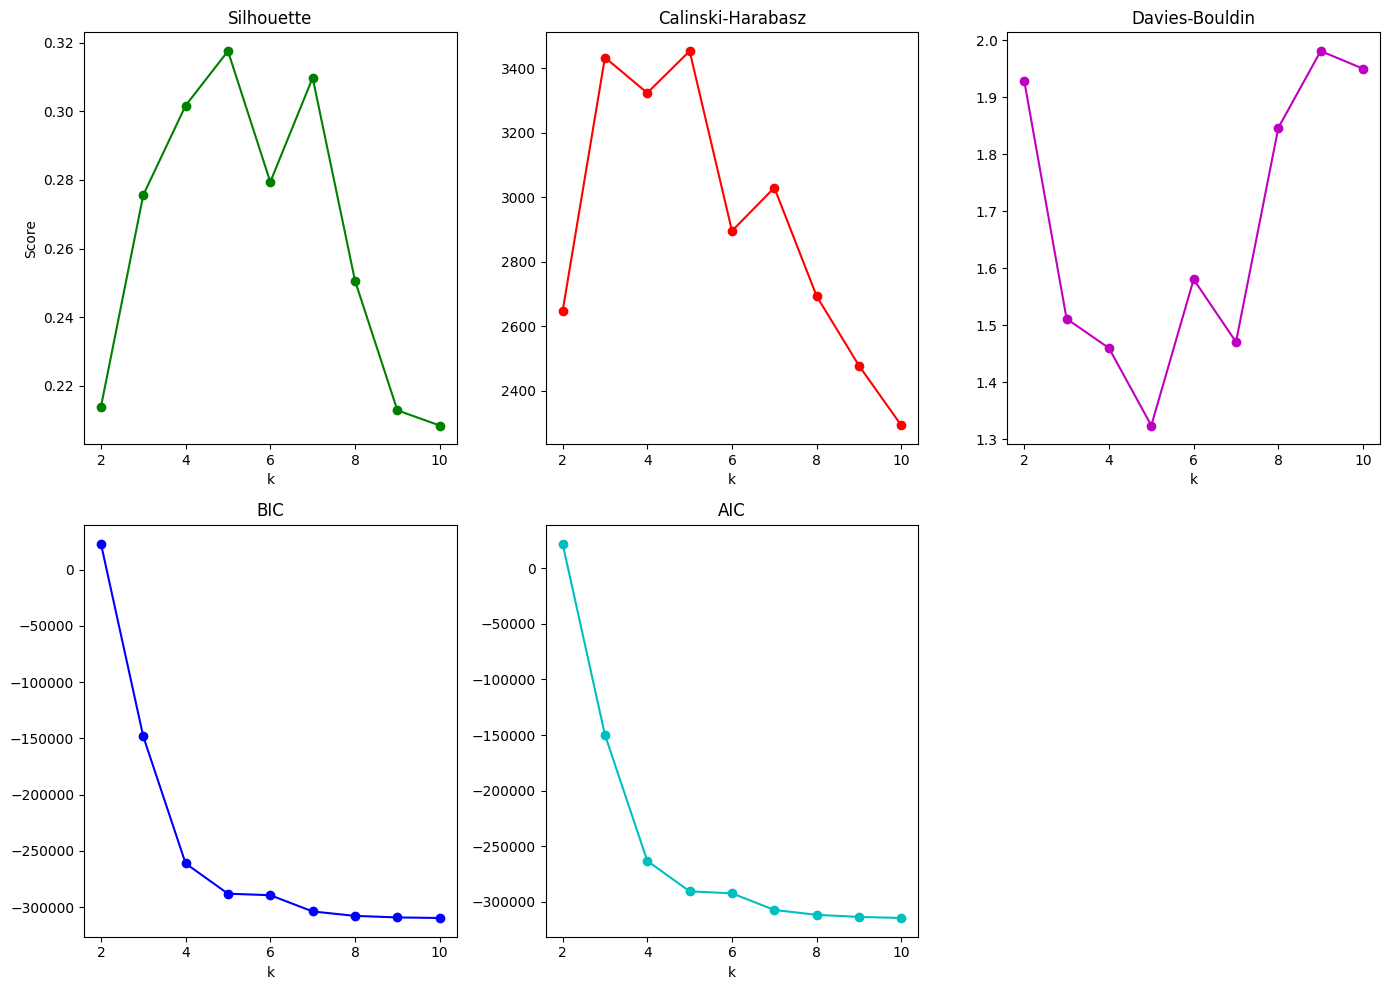

In [29]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)

k_range=range(2, 11) 
def best_k_gmm(X):
    results = []

    for k in k_range:
        gmm = GaussianMixture(n_components=k, covariance_type='full',random_state=42)

        labels = gmm.fit_predict(X)

        sil = silhouette_score(X, labels)
        ch = calinski_harabasz_score(X, labels)
        db = davies_bouldin_score(X, labels)
        bic = gmm.bic(X)
        aic = gmm.aic(X)

        results.append((k, sil, ch, db, bic, aic))

    df = pd.DataFrame(
        results,
        columns=["k", "Silhouette", "Calinski_Harabasz", "Davies_Bouldin", "BIC", "AIC"]
    )

    best = {
        "Silhouette": df.loc[df["Silhouette"].idxmax(), "k"],
        "Calinski_Harabasz": df.loc[df["Calinski_Harabasz"].idxmax(), "k"],
        "Davies_Bouldin": df.loc[df["Davies_Bouldin"].idxmin(), "k"]
    }

    for metric, value in best.items():
        print(f"{metric}: {value}")

    return df, best

df_results, best_k = best_k_gmm(X_pca)
print(df_results)
print(best_k)

fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# Silhouette (max)
axes[0, 0].plot(k_range, df_results["Silhouette"], 'go-')
axes[0, 0].set_title('Silhouette')
axes[0, 0].set_xlabel('k')
axes[0, 0].set_ylabel('Score')

# Calinski-Harabasz (max)
axes[0, 1].plot(k_range, df_results["Calinski_Harabasz"], 'ro-')
axes[0, 1].set_title('Calinski-Harabasz')
axes[0, 1].set_xlabel('k')

# Davies-Bouldin (min)
axes[0, 2].plot(k_range, df_results["Davies_Bouldin"], 'mo-')
axes[0, 2].set_title('Davies-Bouldin')
axes[0, 2].set_xlabel('k')

# BIC (min)
axes[1, 0].plot(k_range, df_results["BIC"], 'bo-')
axes[1, 0].set_title('BIC')
axes[1, 0].set_xlabel('k')

# AIC (min)
axes[1, 1].plot(k_range, df_results["AIC"], 'co-')
axes[1, 1].set_title('AIC')
axes[1, 1].set_xlabel('k')

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

Lakat se nalazi za BIC i AIC na 4 i 5, takođe i ostalim metodama se dobija da je najbolja vrednost 5 za k. Uzimamo K=5.

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                            
GaussianMixture         0.317575       3452.589221        1.32421

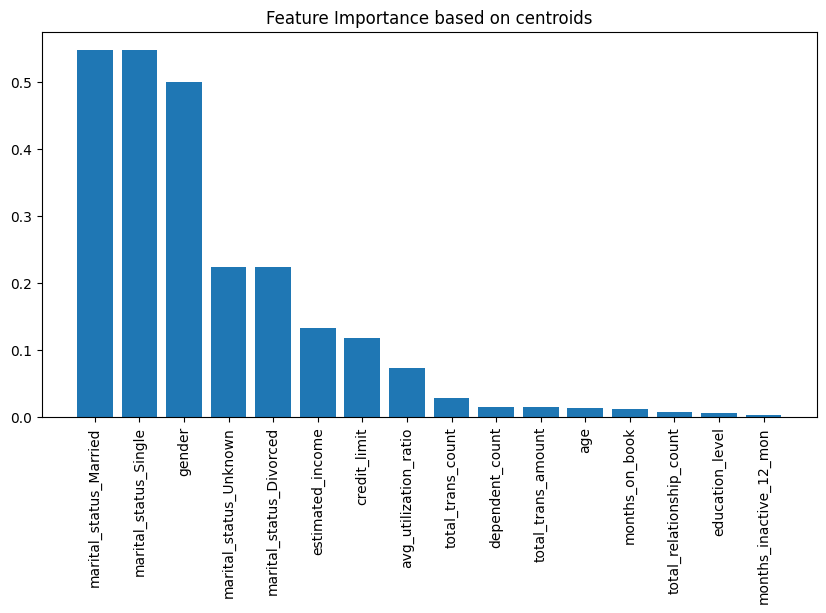

In [30]:
gmm = GaussianMixture(n_components=5, covariance_type='full',random_state=42)

labels = gmm.fit_predict(X_pca)

plot_clusters_3d(X_pca, labels, ' GaussianMixture na PCA_10 3D')
append_results('GaussianMixture', X_pca, labels)
featire_importance = plot_feature_importance(df_scaled, labels)

### BIRCH


Najbolji parametri:
Silhouette: k=4.0, threshold=0.3
Calinski_Harabasz: k=2.0, threshold=0.01
Davies_Bouldin: k=7.0, threshold=0.2


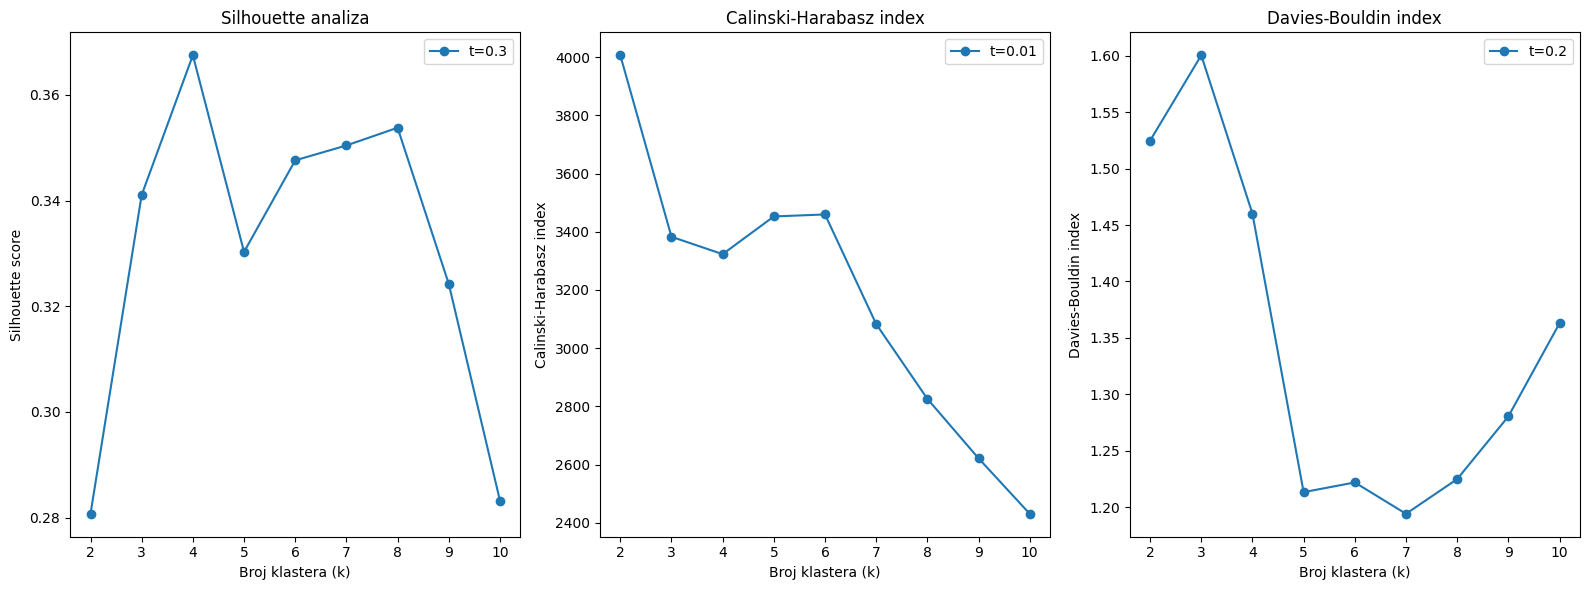

   k  threshold  Silhouette  Calinski_Harabasz  Davies_Bouldin
0  2       0.01    0.283446        4006.574790        1.524752
1  3       0.01    0.341072        3382.658717        1.600437
2  4       0.01    0.301690        3322.966740        1.460046
3  5       0.01    0.317575        3452.589221        1.324210
4  6       0.01    0.347624        3459.456564        1.221936
{'Silhouette': k            4.0
threshold    0.3
Name: 74, dtype: float64, 'Calinski_Harabasz': k            2.00
threshold    0.01
Name: 0, dtype: float64, 'Davies_Bouldin': k            7.0
threshold    0.2
Name: 68, dtype: float64}


In [31]:
from sklearn.cluster import Birch
import pandas as pd
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
import matplotlib.pyplot as plt
import numpy as np

thresholds = [0.01, 0.02, 0.05, 0.08, 0.1, 0.12, 0.15, 0.2, 0.3]
k_range = range(2, 11)

def best_k_birch(X):
    results = []

    for t in thresholds:
        for k in k_range:
            model = Birch(threshold=t, n_clusters=k)
            labels = model.fit_predict(X)
            if len(np.unique(labels)) < 2:
                continue

            sil = silhouette_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
            db = davies_bouldin_score(X, labels)

            results.append((k, t, sil, ch, db))

    df = pd.DataFrame(
        results,
        columns=["k", "threshold", "Silhouette", "Calinski_Harabasz", "Davies_Bouldin"]
    )

    best = {
        "Silhouette": df.loc[df["Silhouette"].idxmax(), ["k", "threshold"]],
        "Calinski_Harabasz": df.loc[df["Calinski_Harabasz"].idxmax(), ["k", "threshold"]],
        "Davies_Bouldin": df.loc[df["Davies_Bouldin"].idxmin(), ["k", "threshold"]],
    }

    print("\nNajbolji parametri:")
    for metric, row in best.items():
        print(f"{metric}: k={row['k']}, threshold={row['threshold']}")

    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    metrics = [
        ("Silhouette", "Silhouette score", "Silhouette analiza", 0),
        ("Calinski_Harabasz", "Calinski-Harabasz index", "Calinski-Harabasz index", 1),
        ("Davies_Bouldin", "Davies-Bouldin index", "Davies-Bouldin index", 2),
    ]

    for col, ylabel, title, ax_idx in metrics:
        best_t = best[col]["threshold"]
        subset = df[df["threshold"] == best_t]
        axes[ax_idx].plot(subset["k"], subset[col], 'o-', label=f't={best_t}')
        axes[ax_idx].set_xlabel('Broj klastera (k)')
        axes[ax_idx].set_ylabel(ylabel)
        axes[ax_idx].set_title(title)
        axes[ax_idx].set_xticks(list(k_range))
        axes[ax_idx].legend()

    plt.tight_layout()
    plt.show()

    return df, best

df_results_birch, best_birch = best_k_birch(X_pca)
print(df_results_birch.head())
print(best_birch)


Uzimamo K=4 i trashold=0.3

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                  
Birch          0.36752       2810.030343       1.204884

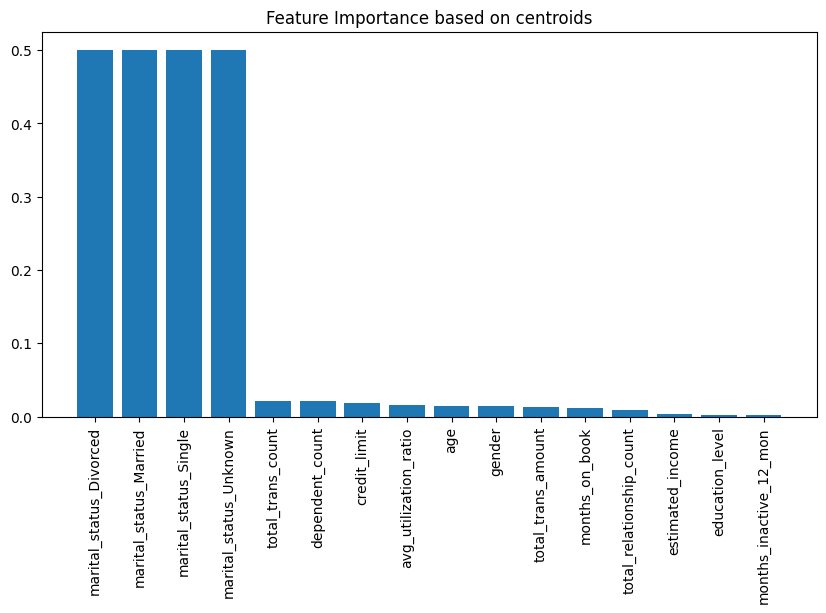

In [32]:
from sklearn.cluster import Birch

labels = Birch(threshold=0.3, n_clusters=4).fit_predict(X_pca)

plot_clusters_3d(X_pca, labels, ' Birch na PCA_10 3D')
append_results('Birch', X_pca, labels)
featire_importance = plot_feature_importance(df_scaled, labels)

## Odabir najboljeg algoritma

In [33]:
results.sort_values(by='Silhouette Score', ascending=False)

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
MeanShift                                          0.36752       2810.030343       1.204884
SpectralClustering                                 0.36752       2810.030343       1.204884
Birch                                              0.36752       2810.030343       1.204884
KMeans (k=6)                                      0.347624       3459.456564       1.221936
DBSCAN                                            0.346961       2398.828728       1.652433
GaussianMixture                                   0.317575       3452.589221        1.32421
Hierarchical (dendrogram cut height = 55)         0.315385       3012.218791       1.682093
Hierarchical (dendrogram cut height = 30)         0.309932       2885.563602       1.339052
Hierarchical (dendrogram cut height = 20)         0.283937       2151.375838       1.540898
Hierarchical (dendrogram cut height = 40)         0.282274       2942.068905        1.41253
Hierarchical (dendrogram cut height = 50)         0.271052       2899.655868       1.544479
Hierarchical (dendrogram cut height = 75)         0.262194       3632.799973       1.607823

In [34]:
results.sort_values(by='Calinski-Harabasz', ascending=False)

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
Hierarchical (dendrogram cut height = 75)         0.262194       3632.799973       1.607823
KMeans (k=6)                                      0.347624       3459.456564       1.221936
GaussianMixture                                   0.317575       3452.589221        1.32421
Hierarchical (dendrogram cut height = 55)         0.315385       3012.218791       1.682093
Hierarchical (dendrogram cut height = 40)         0.282274       2942.068905        1.41253
Hierarchical (dendrogram cut height = 50)         0.271052       2899.655868       1.544479
Hierarchical (dendrogram cut height = 30)         0.309932       2885.563602       1.339052
MeanShift                                          0.36752       2810.030343       1.204884
SpectralClustering                                 0.36752       2810.030343       1.204884
Birch                                              0.36752       2810.030343       1.204884
DBSCAN                                            0.346961       2398.828728       1.652433
Hierarchical (dendrogram cut height = 20)         0.283937       2151.375838       1.540898

In [35]:
results.sort_values(by='Davies-Bouldin', ascending=True)

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                                      
SpectralClustering                                 0.36752       2810.030343       1.204884
Birch                                              0.36752       2810.030343       1.204884
MeanShift                                          0.36752       2810.030343       1.204884
KMeans (k=6)                                      0.347624       3459.456564       1.221936
GaussianMixture                                   0.317575       3452.589221        1.32421
Hierarchical (dendrogram cut height = 30)         0.309932       2885.563602       1.339052
Hierarchical (dendrogram cut height = 40)         0.282274       2942.068905        1.41253
Hierarchical (dendrogram cut height = 20)         0.283937       2151.375838       1.540898
Hierarchical (dendrogram cut height = 50)         0.271052       2899.655868       1.544479
Hierarchical (dendrogram cut height = 75)         0.262194       3632.799973       1.607823
DBSCAN                                            0.346961       2398.828728       1.652433
Hierarchical (dendrogram cut height = 55)         0.315385       3012.218791       1.682093

Biramo K-Means jer daje solidne rezultate po svakom od score-ova. Po silluete i davies-bouldin score-u iste najbolje rezultate daju SpectralClustering, Birc i Menashift, sa istim vrednostima. Tako da mozemo da kazemo da je tu an drugom emstu KMeans sa k=6, a i po Calinski-Harabas metrici on je drugi koji daje najbolje rezultate.

## Analiza klastera i biznis strategija

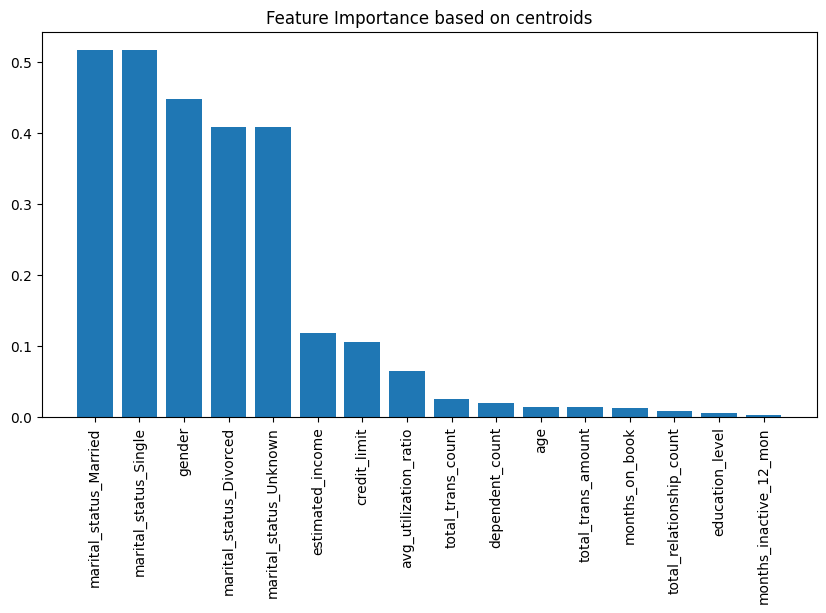

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                         
KMeans (k=6)         0.347624       3459.456564       1.221936

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)
plot_clusters_3d(X_pca, labels, 'KMeans (k=6) na PCA_10 3D')
featire_importance = plot_feature_importance(df_scaled, labels)
append_results('KMeans (k=6)', X_pca, labels)

S obzirom da postoji veliki broj kolona ciji je feature importance dosta nizak (u nasem slučaju mani od 0.02), probacemo da izbacimo te kolone.

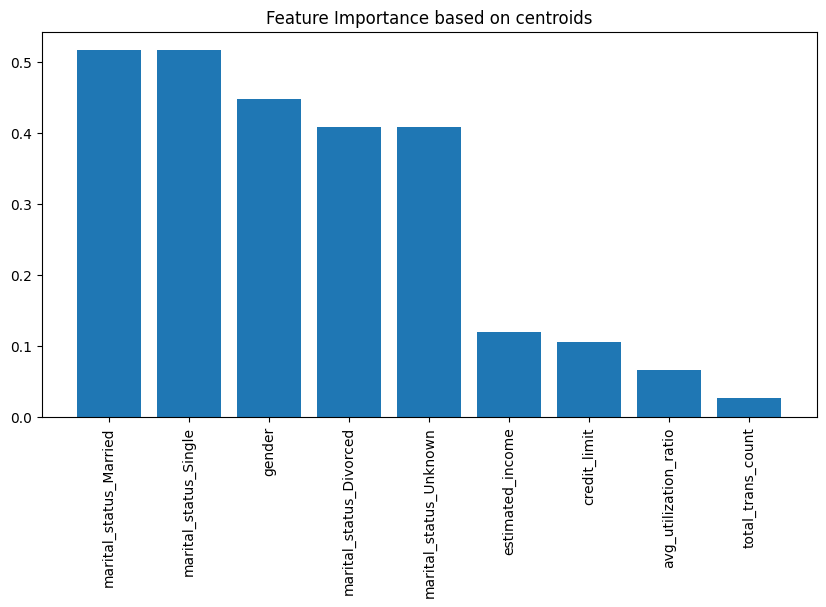

Silhouette Score Calinski-Harabasz Davies-Bouldin
Model                                                                             
KMeans (k=6) - filtered features         0.655859      12272.523174       0.674195

In [37]:
selected_features = featire_importance[featire_importance >= 0.02].index.tolist()
df_filtered = df_scaled[selected_features]

pca_filtered = PCA()
pca_filtered.fit(df_filtered)
cumvar = np.cumsum(pca_filtered.explained_variance_ratio_)
n_components = np.argmax(cumvar >= 0.90) + 1

pca_filtered = PCA(n_components=n_components)
X_pca_filtered = pca_filtered.fit_transform(df_filtered)

kmeans_filtered = KMeans(n_clusters=6, random_state=42, n_init=10)
labels_filtered = kmeans_filtered.fit_predict(X_pca_filtered)

plot_clusters_3d(X_pca_filtered, labels_filtered, 'KMeans (k=6) - filtered features + PCA 3D')
plot_feature_importance(df_filtered, labels_filtered)
append_results('KMeans (k=6) - filtered features', X_pca_filtered, labels_filtered)

Brisanje ovih kolona je dovelo do skoka silhouerre score-a.

Sledeće ćemo prikazati vrednosti feature-a po klasterima da bismo prikazali karakteristike klastera.

Prosečne vrednosti atributa po klasteru (K-Means):

         marital_status_Married  marital_status_Single  gender  marital_status_Divorced  marital_status_Unknown  estimated_income  credit_limit  avg_utilization_ratio  total_trans_count
Klaster                                                                                                                                                                                  
0                           1.0                    0.0    1.00                      0.0                     0.0          39823.75       4646.47                   0.35              63.67
1                           0.0                    1.0    1.00                      0.0                     0.0          39537.88       5224.87                   0.33              68.52
2                           1.0                    0.0    0.00                      0.0                     0.0          88293.83      11836.67                   0.22              59.60
3                 

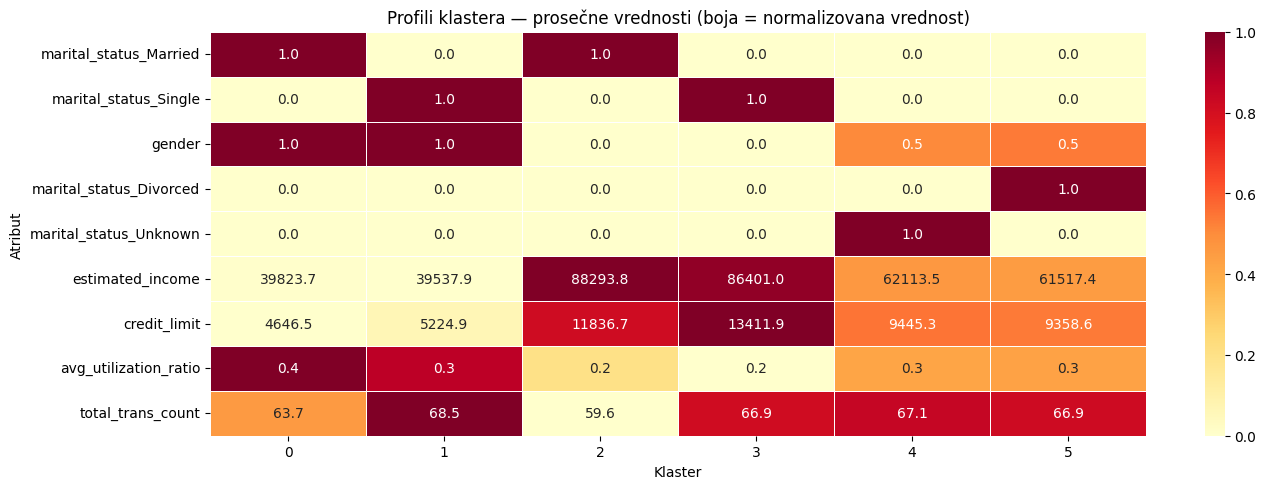

In [38]:
df_analysis = df[selected_features].copy()
df_analysis['Klaster'] = labels_filtered

cluster_profiles = df_analysis.groupby('Klaster').mean()
print("Prosečne vrednosti atributa po klasteru (K-Means):\n")
print(cluster_profiles.round(2).to_string())

cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())
plt.figure(figsize=(14, 5))
sns.heatmap(cluster_profiles_norm.T, annot=cluster_profiles.T.round(1).values,
            fmt='', cmap='YlOrRd', linewidths=0.5)
plt.title("Profili klastera — prosečne vrednosti (boja = normalizovana vrednost)")
plt.xlabel("Klaster")
plt.ylabel("Atribut")
plt.tight_layout()
plt.show()

Prosečne vrednosti atributa po klasteru (K-Means):

         marital_status_Married  marital_status_Single  gender  marital_status_Divorced  marital_status_Unknown  estimated_income  credit_limit  avg_utilization_ratio  total_trans_count
Klaster                                                                                                                                                                                  
0                           1.0                    0.0    1.00                      0.0                     0.0          39823.75       4646.47                   0.35              63.67
1                           0.0                    1.0    1.00                      0.0                     0.0          39537.88       5224.87                   0.33              68.52
2                           1.0                    0.0    0.00                      0.0                     0.0          88293.83      11836.67                   0.22              59.60
3                 

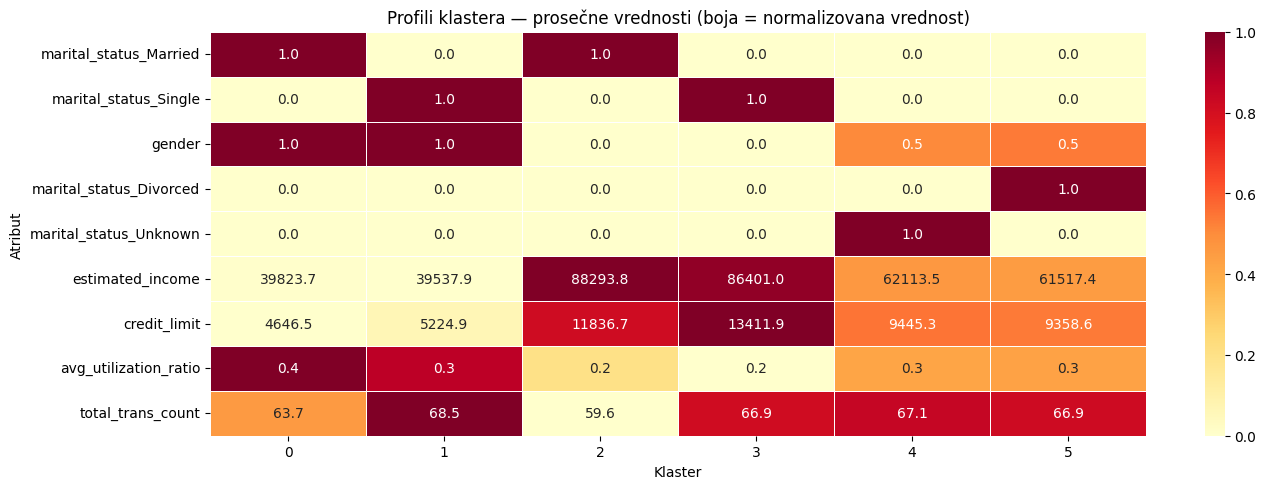


RASPODELA KORISNIKA PO KLASTERIMA

Klaster    Broj korisnika       Procenat        Grafički prikaz               
---------------------------------------------------------------------------
0          2,451                24.2          % ████████████
1          2,125                21.0          % ██████████
2          2,236                22.1          % ███████████
3          1,818                18.0          % ████████
4          749                  7.4           % ███
5          748                  7.4           % ███

UKUPNO     10,127               100.0%        


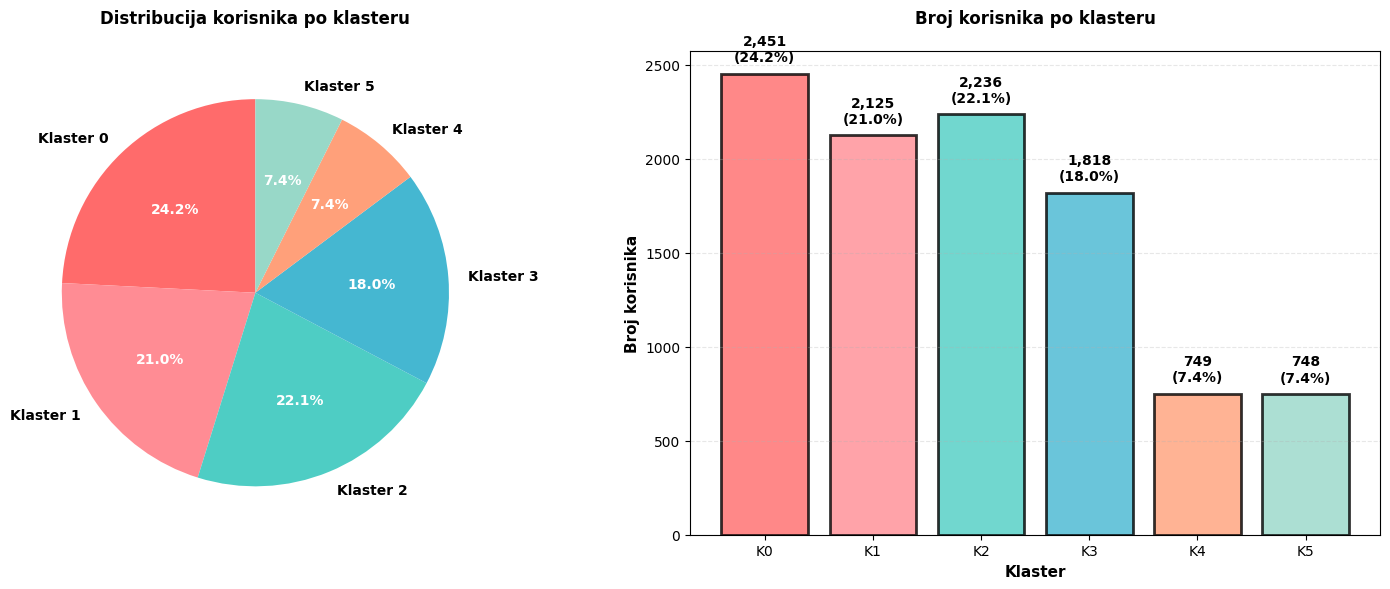


DETALJNE STATISTIKE PO KLASTERU

────────────────────────────────────────────────────────────────────────────────
KLASTER 0 - 2,451 korisnika (24.2%)
────────────────────────────────────────────────────────────────────────────────
Atribut                        Srednja vrednost     Std Dev         Min            
--------------------------------------------------------------------------------
marital_status_Married         1.00                 0.00            1.00           
marital_status_Single          0.00                 0.00            0.00           
gender                         1.00                 0.00            1.00           
marital_status_Divorced        0.00                 0.00            0.00           
marital_status_Unknown         0.00                 0.00            0.00           
estimated_income               39823.75             22842.99        20000.00       
credit_limit                   4646.47              4678.28         1438.30        
avg_utilization

In [39]:
df_analysis = df[selected_features].copy()
df_analysis['Klaster'] = labels_filtered

cluster_profiles = df_analysis.groupby('Klaster').mean()
print("Prosečne vrednosti atributa po klasteru (K-Means):\n")
print(cluster_profiles.round(2).to_string())

cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())
plt.figure(figsize=(14, 5))
sns.heatmap(cluster_profiles_norm.T, annot=cluster_profiles.T.round(1).values,
            fmt='', cmap='YlOrRd', linewidths=0.5)
plt.title("Profili klastera — prosečne vrednosti (boja = normalizovana vrednost)")
plt.xlabel("Klaster")
plt.ylabel("Atribut")
plt.tight_layout()
plt.show()


print("\n" + "=" * 80)
print("RASPODELA KORISNIKA PO KLASTERIMA")
print("=" * 80)

cluster_counts = df_analysis['Klaster'].value_counts().sort_index()

print(f"\n{'Klaster':<10} {'Broj korisnika':<20} {'Procenat':<15} {'Grafički prikaz':<30}")
print("-" * 75)

for cluster_id in sorted(df_analysis['Klaster'].unique()):
    count = cluster_counts[cluster_id]
    pct = count / len(df_analysis) * 100
    bar = '█' * int(pct / 2)  # Scale down za prikaz
    print(f"{cluster_id:<10} {count:<20,} {pct:<14.1f}% {bar}")

print(f"\n{'UKUPNO':<10} {len(df_analysis):<20,} {'100.0%':<14}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#FF6B6B', '#FF8C94', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
wedges, texts, autotexts = ax1.pie(cluster_counts.values, 
                                     labels=[f'Klaster {i}' for i in cluster_counts.index],
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90,
                                     textprops={'fontsize': 10, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

ax1.set_title('Distribucija korisnika po klasteru', fontsize=12, weight='bold', pad=20)

bars = ax2.bar(range(len(cluster_counts)), cluster_counts.values, color=colors, 
               edgecolor='black', linewidth=2, alpha=0.8)

for i, (bar, v) in enumerate(zip(bars, cluster_counts.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, v + 50, f'{v:,}\n({v/len(df_analysis)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2.set_xlabel('Klaster', fontsize=11, weight='bold')
ax2.set_ylabel('Broj korisnika', fontsize=11, weight='bold')
ax2.set_title('Broj korisnika po klasteru', fontsize=12, weight='bold', pad=20)
ax2.set_xticks(range(len(cluster_counts)))
ax2.set_xticklabels([f'K{i}' for i in cluster_counts.index], fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


print("\n" + "=" * 80)
print("DETALJNE STATISTIKE PO KLASTERU")
print("=" * 80)

for cluster_id in sorted(df_analysis['Klaster'].unique()):
    cluster_data = df_analysis[df_analysis['Klaster'] == cluster_id].drop('Klaster', axis=1)
    count = len(cluster_data)
    pct = count / len(df_analysis) * 100
    
    print(f"\n{'─' * 80}")
    print(f"KLASTER {cluster_id} - {count:,} korisnika ({pct:.1f}%)")
    print(f"{'─' * 80}")
    
    # Prikaži statistiku
    stats = cluster_data.describe().loc[['count', 'mean', 'std', 'min', 'max']].T
    
    print(f"{'Atribut':<30} {'Srednja vrednost':<20} {'Std Dev':<15} {'Min':<15}")
    print("-" * 80)
    
    for col in cluster_data.columns:
        mean_val = cluster_data[col].mean()
        std_val = cluster_data[col].std()
        min_val = cluster_data[col].min()
        print(f"{col:<30} {mean_val:<20.2f} {std_val:<15.2f} {min_val:<15.2f}")

print("\n" + "=" * 100)
print("SUMMARY - POREĐENJE KLASTERA")
print("=" * 100)

summary_data = []
for cluster_id in sorted(df_analysis['Klaster'].unique()):
    cluster_data = df_analysis[df_analysis['Klaster'] == cluster_id].drop('Klaster', axis=1)
    count = cluster_counts[cluster_id]
    
    summary_row = {
        'Klaster': f'K{cluster_id}',
        'Korisnika': f'{count:,}',
        'Procenat': f'{count/len(df_analysis)*100:.1f}%',
    }
    
    for col in cluster_data.columns:
        summary_row[col] = f'{cluster_data[col].mean():.1f}'
    
    summary_data.append(summary_row)

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print("=" * 100)

Opis korisnika po klasterima:

1. Klaster 0 

Ovu grupu čine stabilni, tradicionalni korisnici banke sa dugogodišnjem iskustvom.
Ovo su uglavnom stariji ili sredovečni korisnici (prosečna starost 55 godina) koji su dugte vreme prisutni u banci (prosečno 120+ meseci). Njihova primanja su umerenica(40k godišnje), a koriste standardne bankovne proizvode sa niskom transakcijskom aktivnošću.Karakteriše ih niska prosečna stopa iskorišćenosti kredita(oko 10%), što sugeriše redovno plaćanje obaveza. Ovaj klaster karakterise to i da su sve u pitanju udate zene.

2. Klaster 1 

Ovu grupu čine single žene sa prosečnim primanjima (40k godišnje) sa višim brojem transakcija.Njihova primanja su prosečna, ali visoka aktivnost sugeriše da su to korisnici
koji redovno zarađuju i troše. Koriste kredite efikasno sa prosečnom stopom iskorišćenosti
od 30%, što pokazuje aktuerenje finansijskih proizvoda.

3. Klaster 2

Ovu grupu korisnika čine oženjeni muškarci sa visokim godisnjim primanjima (90K), dvostruko veća od ostalih klastera. Banke su im odobrile velike kreditne limitima (11,800+), što reflektuje njihovu
kreditnu sposobnost i povećanje rizika koji su spremne da preuzmu. Uprkos visokim
limitima, njihova stopa iskorišćenosti je niska (~20%), što sugeriše da ova grupa
ima druga sredstva ili može lako vratiti dugove. Transakcijska aktivnost je stabilna
sa prosečno 60 transakcija.

4. Klaster 3

Ovu grupu čine single muškarci čiji su kreditni limitima
najveći u svojoj kategoriji (13,400+). Stopa iskorišćenosti kredita je niska, što sugeriše
da ova grupa ima pristop drugim izvorima finansiranja.

5. Klaster 4

Ovu grupu čine razvedeni korisnici sa dodatnim obavezama. Svi korisnici u ovoj grupi su razvedeni, što znači da su verovatno imali značajne finansijske obaveze vezane za razvodu (alimentacija, deljenje zajedničke imovine, itd). Njihova primanja su srednja (62K), što je malo ispod proseka, što često predstavlja rezultat finansijskog bremena razvode. Kreditni limiti su umereni, što sugeriše da banke prate njihove finansijske obaveze sa povećanom pažnjom i oprezom. Transakcijska aktivnost je relativno niska , a stopa iskorišćenosti kredita je umerena.
        
6. Klaster 5 

Ovu grupu čine korisnici sa nejasnim ili nepoznatim bračnim statusom. Primanja su srednja (62K), a mešovit je pol u ovoj grupi. Kreditni limiti su umereni






Moze se uociti dobra raspodela klastera po finansijskoj situaciji:

Klaster 0 i 1 predstavljaju niži finansijski segment korisnika. Ovi klijenti imaju najniža prosečna primanja i niže kreditne limite, dok je stepen iskorišćenosti limita relativno viši u odnosu na ostale klastere. To ukazuje na veću zavisnost od kreditnih sredstava i potencijalno viši rizik u odnosu na druge segmente.

Klaster 4 i 5 čine srednji finansijski segment. Ovi korisnici imaju umerena primanja i kreditne limite, kao i stabilan nivo iskorišćenosti kredita. Predstavljaju balans između kreditne sposobnosti i potrošačkog ponašanja.

Klaster 2 i 3 predstavljaju viši finansijski segment. Ove korisnike karakterišu visoka primanja i visoki kreditni limiti, uz najniži prosečan utilization. To ukazuje na veću finansijsku stabilnost i manju zavisnost od kreditnog limita.

Model dodatno identifikuje demografske podsegmente. Izgleda da su po finansijskim podacima klijenti podeljeni na 3 klastera, a dodatno po demografskim podacima na jos 3.


### Korišćenje informacija o rasporedu klijenata
Banka bi ove informacije mogla da iskoristi tako što bi prema svakom klasteru primenila drugačiju strategiju upravljanja klijentima.

Klijenti u klasterima 0 i 1 predstavljau klijente sa nižim primanjima i oni koji imaju veće korišćenje kredita.
Kod njih bi banka mogla da uvede malo stroži monitoring, da prati da li utilization raste, da ponudi rate bez kamate ili opcije za lakšu otplatu. Tako se smanjuje rizik, a klijentima se pomaže da lakše upravljaju dugom.

Klasteri 2 i 3 su klijenti sa visokim primanjima i niskim utilization-om. Oni ne zavise mnogo od kredita i predstavljaju finansijski stabilan deo klijenata. Prema njima banka može primeniti premium strategiju – ponuditi Gold ili Platinum kartice, investicione proizvode, personalizovane usluge i jos pogodnosti kako bi ostali kod njih u banci

Klasteri 4 i 5 su stabilni korisnici sa umerenim primanjima i relativno uravnoteženim korišćenjem kredita. Ovo je grupa sa potencijalom za rast. Njima banka može nuditi dodatne proizvode, poput potrošačkih kredita, osiguranja ili programa lojalnosti. Takođe, može im postepeno povećavati limit, jer pokazuju stabilno ponašanje.

Vidimo da nema razloga da se deli na 6 klastera da bi se opisali korisnici tako da koriste banki da poboljsa svoje poslovanje. Vidimo da je glevni razlog podele na 6 klastera marital_status i gender. Znaci da veliku ulogu imaju podaci koji nisu vezani za same finansije. Ovakva podela bi bila u redu da mi gledamo ko najviše troši, sa kakvim društvenim statusom i polom. Međutim, mi želimo da vidimo kako će banka da zadrži klijente i gledaćemo iz njenog aspekta, tako da su ove informacije o samom bracnom satusu i polu nerelevantne.
Zadržaćemo kolone vezane za finansijski status klijenata.



In [40]:

financial_features = [
    "estimated_income",
    "credit_limit",
    "total_trans_amount",
    "total_trans_count",
    "avg_utilization_ratio",
    "months_on_book",
    "months_inactive_12_mon"
]

X = df[financial_features].copy()


from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)



In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

for k in range(3, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    sil = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    
    print(f"k={k} | Silhouette={sil:.4f} | CH={ch:.2f} | DB={db:.4f}")

k=3 | Silhouette=0.3049 | CH=3293.48 | DB=1.2818
k=4 | Silhouette=0.2110 | CH=3144.94 | DB=1.4538
k=5 | Silhouette=0.1970 | CH=2806.34 | DB=1.4361
k=6 | Silhouette=0.1973 | CH=2577.31 | DB=1.3935
k=7 | Silhouette=0.1926 | CH=2382.06 | DB=1.4293
k=8 | Silhouette=0.1936 | CH=2228.29 | DB=1.4395


Odavde vidimo da je nabolja vrednost Silhouette kada je K=3. Ovde necemo raditi PCA jer imamo manji broj kolona. Probali smo smo umesto MinMax slacar-a da radimo sa Robust scalar. Sada smo radili sada samo sa finansijskim podacima, koji skoro uvek imaju ekstremne vrednosti. Ako jedan klijent ima ogroman limit, on postaje max i cela skala se rastegne zbog njega. Posledica može da bude to što se većina klijenata sabije u uski opseg razlike među tipičnim klijentima postaju manje vidljive. KMenas centri se pomeraju ka ekstremima

In [42]:
kmeans_final = KMeans(n_clusters=3, n_init=10, random_state=42)
df["cluster"] = kmeans_final.fit_predict(X_scaled)


cluster_profile = df.groupby("cluster")[financial_features].mean()
print(cluster_profile)

df_analysis = df[financial_features].copy()
df_analysis["cluster"] = df["cluster"]


         estimated_income  credit_limit  total_trans_amount  total_trans_count  avg_utilization_ratio  months_on_book  months_inactive_12_mon
cluster                                                                                                                                      
0           109906.100796  22698.660477         3583.418037          59.181963               0.060936       36.368700                2.329973
1            67016.766467  13902.948503        14100.755689         108.165269               0.172110       34.932934                2.204790
2            49349.804239   4457.926029         3519.820170          61.421358               0.340930       35.928581                2.359390


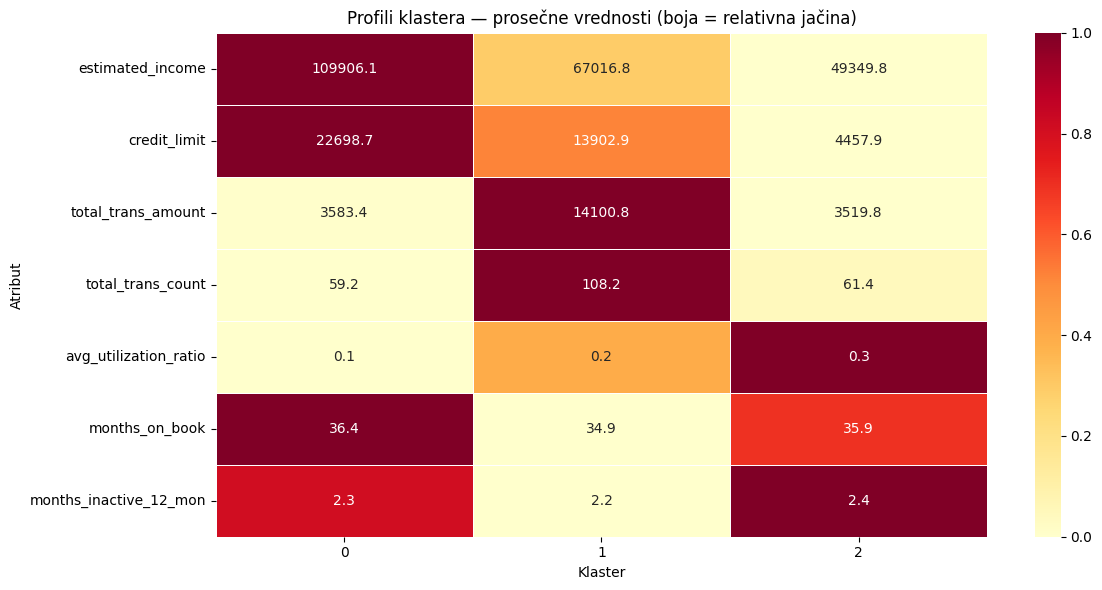

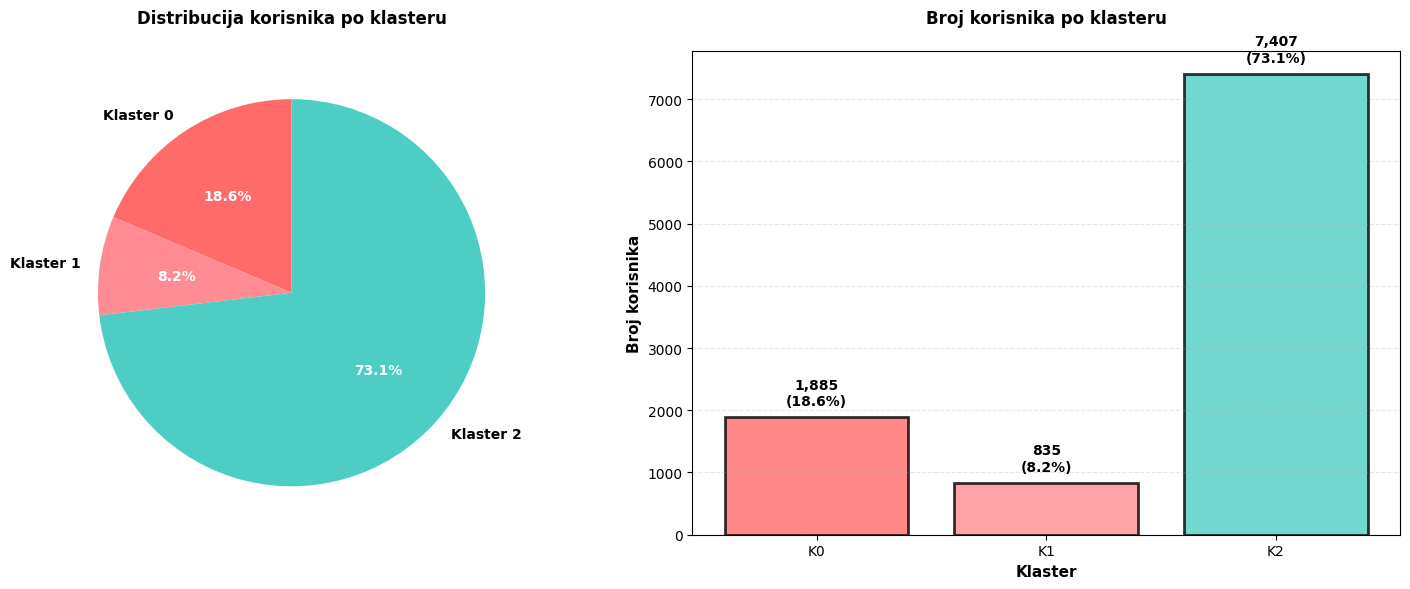

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_profiles = df_analysis.groupby("cluster").mean()

cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (
    cluster_profiles.max() - cluster_profiles.min()
)

plt.figure(figsize=(12, 6))

sns.heatmap(
    cluster_profiles_norm.T,
    annot=cluster_profiles.round(1).T,
    fmt="",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("Profili klastera — prosečne vrednosti (boja = relativna jačina)")
plt.xlabel("Klaster")
plt.ylabel("Atribut")
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

cluster_counts = df["cluster"].value_counts().sort_index()
total = len(df)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#FF6B6B', '#FF8C94', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#C7CEEA', '#B5EAD7']

wedges, texts, autotexts = ax1.pie(
    cluster_counts.values,
    labels=[f'Klaster {i}' for i in cluster_counts.index],
    autopct='%1.1f%%',
    colors=colors[:len(cluster_counts)],
    startangle=90,
    textprops={'fontsize': 10, 'weight': 'bold'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

ax1.set_title('Distribucija korisnika po klasteru', fontsize=12, weight='bold', pad=20)


bars = ax2.bar(
    range(len(cluster_counts)),
    cluster_counts.values,
    color=colors[:len(cluster_counts)],
    edgecolor='black',
    linewidth=2,
    alpha=0.8
)

for bar, v in zip(bars, cluster_counts.values):
    pct = v / total * 100
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        v + (0.02 * cluster_counts.values.max()),
        f'{v:,}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=10
    )

ax2.set_xlabel('Klaster', fontsize=11, weight='bold')
ax2.set_ylabel('Broj korisnika', fontsize=11, weight='bold')
ax2.set_title('Broj korisnika po klasteru', fontsize=12, weight='bold', pad=20)
ax2.set_xticks(range(len(cluster_counts)))
ax2.set_xticklabels([f'K{i}' for i in cluster_counts.index], fontsize=10)

ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [47]:
def print_cluster_report(df_analysis, cluster_col="cluster", decimals=2):
    cluster_counts = df_analysis[cluster_col].value_counts().sort_index()
    total = len(df_analysis)

    print("\n" + "=" * 80)
    print("DETALJNE STATISTIKE PO KLASTERU")
    print("=" * 80)

    for cluster_id in cluster_counts.index:
        cluster_data = df_analysis[df_analysis[cluster_col] == cluster_id].drop(columns=[cluster_col])

        count = cluster_counts[cluster_id]
        pct = count / total * 100

        print("\n" + "─" * 80)
        print(f"KLASTER {cluster_id} - {count:,} korisnika ({pct:.1f}%)")
        print("─" * 80)

        stats = cluster_data.agg(['mean', 'std', 'min', 'max']).T.round(decimals)

        print(f"{'Atribut':<30} {'Srednja vrednost':>18} {'Std Dev':>12} {'Min':>12} {'Max':>12}")
        print("-" * 86)

        for col, row in stats.iterrows():
            print(
                f"{col:<30} "
                f"{row['mean']:>18.{decimals}f} "
                f"{row['std']:>12.{decimals}f} "
                f"{row['min']:>12.{decimals}f} "
                f"{row['max']:>12.{decimals}f}"
            )

def print_cluster_summary(df_analysis, cluster_col="cluster", decimals=1):
    cluster_counts = df_analysis[cluster_col].value_counts().sort_index()
    total = len(df_analysis)

    features = [c for c in df_analysis.columns if c != cluster_col]

    means = df_analysis.groupby(cluster_col)[features].mean().round(decimals)

    summary_df = means.copy()
    summary_df.insert(0, "Korisnika", cluster_counts.values)
    summary_df.insert(1, "Procenat", (cluster_counts.values / total * 100).round(1))

    summary_df.index = [f"K{i}" for i in summary_df.index]

    print("\n" + "=" * 100)
    print("SUMMARY - POREĐENJE KLASTERA")
    print("=" * 100)

    printable = summary_df.copy()
    printable["Korisnika"] = printable["Korisnika"].map(lambda x: f"{x:,}")
    printable["Procenat"] = printable["Procenat"].map(lambda x: f"{x:.1f}%")

    print(printable.to_string())
    print("=" * 100)
    
    
print_cluster_report(df_analysis, cluster_col="cluster", decimals=2)
print_cluster_summary(df_analysis, cluster_col="cluster", decimals=1)



DETALJNE STATISTIKE PO KLASTERU

────────────────────────────────────────────────────────────────────────────────
KLASTER 0 - 1,885 korisnika (18.6%)
────────────────────────────────────────────────────────────────────────────────
Atribut                          Srednja vrednost      Std Dev          Min          Max
--------------------------------------------------------------------------------------
estimated_income                        109906.10     41961.16     20000.00    200000.00
credit_limit                             22698.66      8820.65      2106.00     34516.00
avg_utilization_ratio                        0.06         0.06         0.00         0.50
debt_exposure                             1136.88       824.16         0.00      2531.75
avg_transaction_value                       57.79        20.93        19.14       183.54

────────────────────────────────────────────────────────────────────────────────
KLASTER 1 - 835 korisnika (8.2%)
────────────────────────────────

Sada vidimo 3 jasno definisana klastera po finansijskim karakteristikama.
1. Klaster 0 

Ovaj klaster čine klijenti sa najvišim primanjima i najvišim kreditnim limitima, ali sa veoma niskim stepenom iskorišćenosti limita. To ukazuje na finansijsku stabilnost i mali kreditni rizik. Banka ove klijente može da prepozna kao najkorisnije klijente i da im ponudi kartice višeg ranga, investicione proizvode, personalizovane usluge. Fokus je na zadržavanju ovakvih klijenata.

2. Klaster 1

Ovaj klaster karakteriše visok broj i vrednost transakcija, uz umeren utilization. Iako nemaju najviše prihode, oni intenzivno koriste karticu i generišu prihod kroz transakcione naknade. Banka može ovim klijentima može da ponudi programe lojalnosti, cashback kampanje, ekskluzivne ponude ili dodatne kreditne proizvode.Cilj je povećanje profitabilnosti kroz efikasnije iskorišćavanje njihove visoke aktivnosti.

3. Klaster 2

Ovo je najveći klaster koji čine klijenti sa nižim primanjima i manjim kreditnim limitima, ali sa većim korišćenjem dostupnog limita. Zbog toga predstavljaju klaster sa nešto većim rizikom, ali i velikim poslovnim značajem jer čine većinu baze. Banka može da ih prati pažljivije, prilagođava limite i nudi proizvode koji podstiču odgovorno korišćenje kredita, sa ciljem smanjenja rizika i postepenog povećanja njihove vrednosti. Može da ponudi rate bez kamate ili opciju raspodele duga na više meseci, čime smanjuje rizik kašnjenja i povećava verovatnoću uredne otplate.Takođe, banka može primeniti postepeno povećanje limita za klijente koji pokazuju stabilno ponašanje, tj ne kasne, čime podstiče rast prihoda uz kontrolisan rizik.





Iako ovako dobijamo manje score-ove, dobijamo jasnije klastere koji se mogu upotrebiti za dalju analizu.

Da bismo poboljsali score probacemo da odradimo Feature Engineering

In [45]:
df["debt_exposure"] = df["credit_limit"] * df["avg_utilization_ratio"]
df["avg_transaction_value"] = df["total_trans_amount"] / df["total_trans_count"]

financial_features = [
    "estimated_income",
    "credit_limit",
    "avg_utilization_ratio",
    "debt_exposure",
    "avg_transaction_value"
]

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[financial_features])

for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"k={k} | Silhouette={sil:.4f}")


k=3 | Silhouette=0.4156
k=4 | Silhouette=0.2811
k=5 | Silhouette=0.2911
k=6 | Silhouette=0.2886


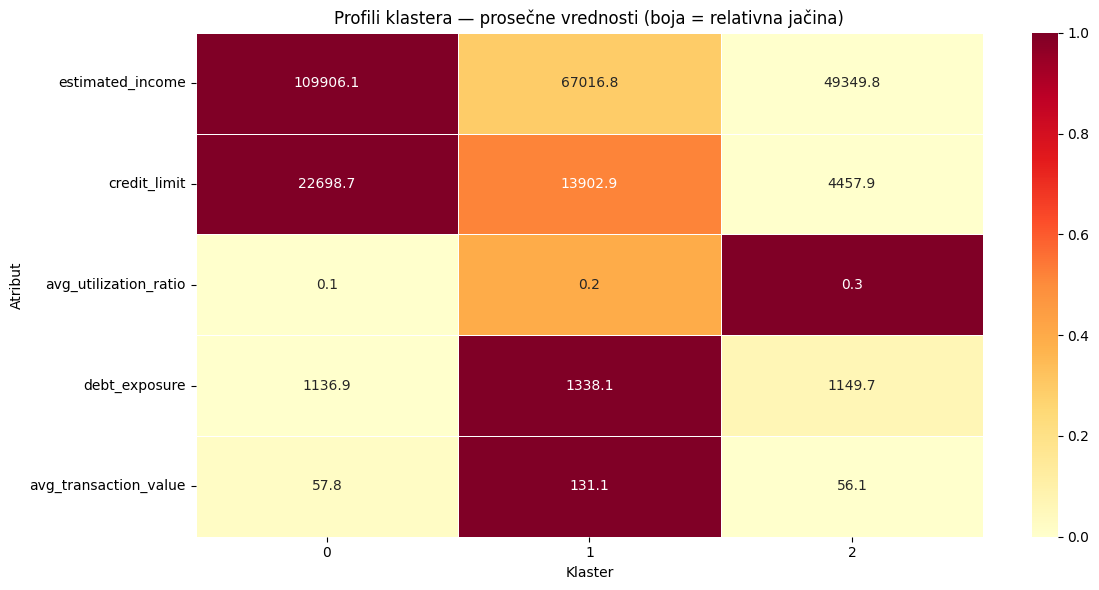

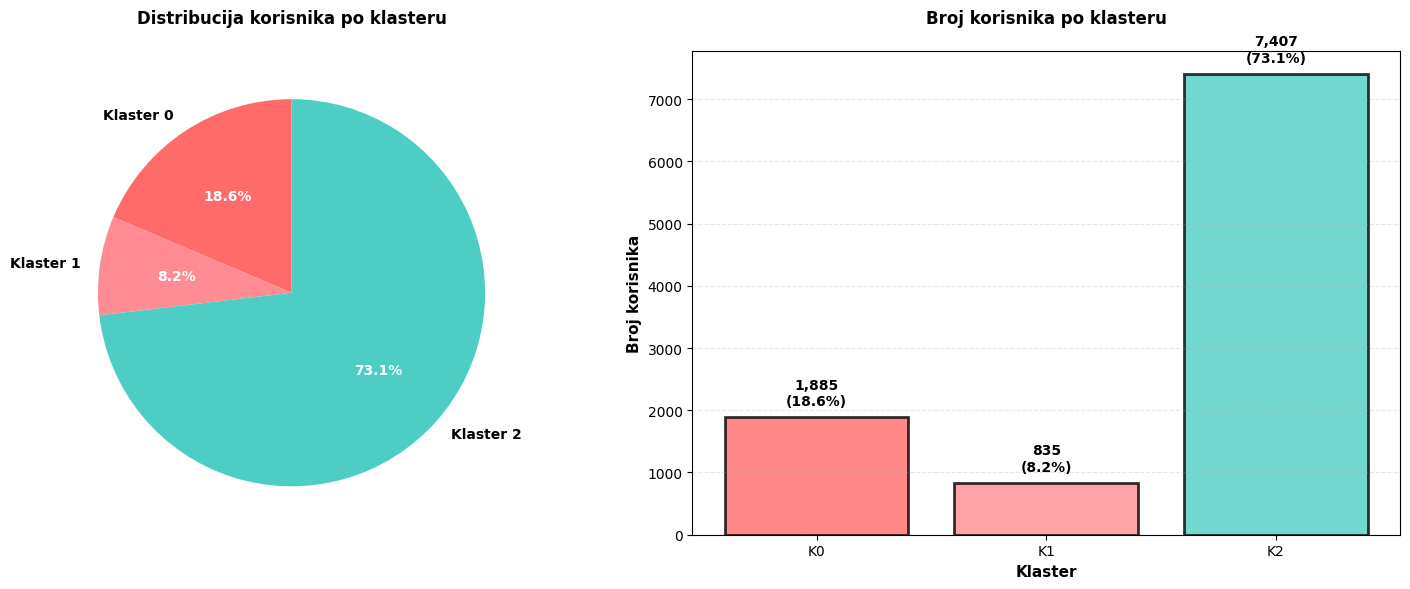


DETALJNE STATISTIKE PO KLASTERU

────────────────────────────────────────────────────────────────────────────────
KLASTER 0 - 1,885 korisnika (18.6%)
────────────────────────────────────────────────────────────────────────────────
Atribut                          Srednja vrednost      Std Dev          Min          Max
--------------------------------------------------------------------------------------
estimated_income                        109906.10     41961.16     20000.00    200000.00
credit_limit                             22698.66      8820.65      2106.00     34516.00
avg_utilization_ratio                        0.06         0.06         0.00         0.50
debt_exposure                             1136.88       824.16         0.00      2531.75
avg_transaction_value                       57.79        20.93        19.14       183.54

────────────────────────────────────────────────────────────────────────────────
KLASTER 1 - 835 korisnika (8.2%)
────────────────────────────────

In [46]:
df_analysis = df[financial_features].copy()
df_analysis["cluster"] = df["cluster"]

cluster_profiles = df_analysis.groupby("cluster")[financial_features].mean()

cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (
    cluster_profiles.max() - cluster_profiles.min()
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    cluster_profiles_norm.T,
    annot=cluster_profiles.round(1).T,
    fmt="",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("Profili klastera — prosečne vrednosti (boja = relativna jačina)")
plt.xlabel("Klaster")
plt.ylabel("Atribut")
plt.tight_layout()
plt.show()


cluster_counts = df_analysis["cluster"].value_counts().sort_index()
total = len(df_analysis)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#FF6B6B', '#FF8C94', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#C7CEEA', '#B5EAD7']

wedges, texts, autotexts = ax1.pie(
    cluster_counts.values,
    labels=[f'Klaster {i}' for i in cluster_counts.index],
    autopct='%1.1f%%',
    colors=colors[:len(cluster_counts)],
    startangle=90,
    textprops={'fontsize': 10, 'weight': 'bold'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

ax1.set_title('Distribucija korisnika po klasteru', fontsize=12, weight='bold', pad=20)

bars = ax2.bar(
    range(len(cluster_counts)),
    cluster_counts.values,
    color=colors[:len(cluster_counts)],
    edgecolor='black',
    linewidth=2,
    alpha=0.8
)

for bar, v in zip(bars, cluster_counts.values):
    pct = v / total * 100
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        v + (0.02 * cluster_counts.values.max()),
        f'{v:,}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=10
    )

ax2.set_xlabel('Klaster', fontsize=11, weight='bold')
ax2.set_ylabel('Broj korisnika', fontsize=11, weight='bold')
ax2.set_title('Broj korisnika po klasteru', fontsize=12, weight='bold', pad=20)
ax2.set_xticks(range(len(cluster_counts)))
ax2.set_xticklabels([f'K{i}' for i in cluster_counts.index], fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


def print_cluster_report(df_analysis, cluster_col="cluster", decimals=2):
    cluster_counts = df_analysis[cluster_col].value_counts().sort_index()
    total = len(df_analysis)

    print("\n" + "=" * 80)
    print("DETALJNE STATISTIKE PO KLASTERU")
    print("=" * 80)

    for cluster_id in cluster_counts.index:
        cluster_data = df_analysis[df_analysis[cluster_col] == cluster_id].drop(columns=[cluster_col])

        count = cluster_counts[cluster_id]
        pct = count / total * 100

        print("\n" + "─" * 80)
        print(f"KLASTER {cluster_id} - {count:,} korisnika ({pct:.1f}%)")
        print("─" * 80)

        stats = cluster_data.agg(['mean', 'std', 'min', 'max']).T.round(decimals)

        print(f"{'Atribut':<30} {'Srednja vrednost':>18} {'Std Dev':>12} {'Min':>12} {'Max':>12}")
        print("-" * 86)

        for col, row in stats.iterrows():
            print(
                f"{col:<30} "
                f"{row['mean']:>18.{decimals}f} "
                f"{row['std']:>12.{decimals}f} "
                f"{row['min']:>12.{decimals}f} "
                f"{row['max']:>12.{decimals}f}"
            )

def print_cluster_summary(df_analysis, cluster_col="cluster", decimals=1):
    cluster_counts = df_analysis[cluster_col].value_counts().sort_index()
    total = len(df_analysis)

    features_local = [c for c in df_analysis.columns if c != cluster_col]
    means = df_analysis.groupby(cluster_col)[features_local].mean().round(decimals)

    summary_df = means.copy()
    summary_df.insert(0, "Korisnika", cluster_counts.values)
    summary_df.insert(1, "Procenat", (cluster_counts.values / total * 100).round(1))

    summary_df.index = [f"K{i}" for i in summary_df.index]

    print("\n" + "=" * 100)
    print("SUMMARY - POREĐENJE KLASTERA")
    print("=" * 100)

    printable = summary_df.copy()
    printable["Korisnika"] = printable["Korisnika"].map(lambda x: f"{x:,}")
    printable["Procenat"] = printable["Procenat"].map(lambda x: f"{x:.1f}%")

    print(printable.to_string())
    print("=" * 100)

print_cluster_report(df_analysis, cluster_col="cluster", decimals=2)
print_cluster_summary(df_analysis, cluster_col="cluster", decimals=1)

Nakon feature engineering-a vidimo da imamo 3 klastera sa gore napomenutim karakteristikama sa boljim score-om.